<a href="https://colab.research.google.com/github/unrebby/data/blob/main/homework_practice_02_linregr_Antonova_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Машинное обучение, ФКН ВШЭ

## Практическое задание 2. Exploratory Data Analysis и линейная регрессия

### Общая информация
Дата выдачи: 25.09.2022

Мягкий дедлайн: 23:59MSK 10.10.2022

Жесткий дедлайн: 23:59MSK 18.10.2022

### О задании
В этом задании мы попытаемся научиться анализировать данные и выделять из них полезные признаки. Мы также научимся пользоваться `seaborn` и `sklearn`, а заодно привыкнем к основным понятиям машинного обучения.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Проверяющий имеет право снизить оценку за неэффективную реализацию или неопрятные графики.

**Обратите внимание**, что в каждом разделе домашнего задания есть оцениваниемые задачи и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи. Если вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то баллы за такое выставлены не будут.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-02-linregr-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

Оценка: 11.

В этом ноутбуке используется библиотека `folium` для визуализации карт. Она работает в google colab!

In [1]:
!pip install folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import folium

m = folium.Map(location=(55.7522200, 37.6155600), zoom_start=10)

m

Если вы всё сделали правильно, то выше должна открыться карта Москвы.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style="darkgrid")

## Часть 0. Подготовка (1 балл)

**Задание 1 (1 балл)**. Мы будем работать с данными из соревнования [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration/overview), в котором нужно было предсказать длительность поездки на такси. Скачайте обучающую выборку из этого соревнования и загрузите ее:

In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"antonovaevgeniya","key":"abcc99d46d49920614693a8fd5c4a08e"}'}

In [5]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
! pip install -q kaggle
! mkdir -p ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle competitions download -c nyc-taxi-trip-duration

 84% 72.0M/85.8M [00:00<00:00, 159MB/s]
100% 85.8M/85.8M [00:00<00:00, 149MB/s]


In [7]:
!unzip nyc-taxi-trip-duration.zip
!unzip train.zip
!unzip test.zip

Archive:  nyc-taxi-trip-duration.zip
  inflating: sample_submission.zip   
  inflating: test.zip                
  inflating: train.zip               
Archive:  train.zip
  inflating: train.csv               
Archive:  test.zip
  inflating: test.csv                


In [8]:
df_train = pd.read_csv('train.csv')

In [9]:
df_train

id  vendor_id      pickup_datetime     dropoff_datetime  \
0        id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1        id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2        id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3        id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4        id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   
...            ...        ...                  ...                  ...   
1458639  id2376096          2  2016-04-08 13:31:04  2016-04-08 13:44:02   
1458640  id1049543          1  2016-01-10 07:35:15  2016-01-10 07:46:10   
1458641  id2304944          2  2016-04-22 06:57:41  2016-04-22 07:10:25   
1458642  id2714485          1  2016-01-05 15:56:26  2016-01-05 16:02:39   
1458643  id1209952          1  2016-04-05 14:44:25  2016-04-05 14:47:43   

         passenger_count  pickup_longitude  pickup_latitude  \
0                      1        -73.982155        40.767937   
1                      1        -73.980415        40.738564   
2                      1        -73.979027        40.763939   
3                      1        -74.010040        40.719971   
4                      1        -73.973053        40.793209   
...                  ...               ...              ...   
1458639                4        -73.982201        40.745522   
1458640                1        -74.000946        40.747379   
1458641                1        -73.959129        40.768799   
1458642                1        -73.982079        40.749062   
1458643                1        -73.979538        40.781750   

         dropoff_longitude  dropoff_latitude store_and_fwd_flag  trip_duration  
0               -73.964630         40.765602                  N            455  
1               -73.999481         40.731152                  N            663  
2               -74.005333         40.710087                  N           2124  
3               -74.012268         40.706718                  N            429  
4               -73.972923         40.782520                  N            435  
...                    ...               ...                ...            ...  
1458639         -73.994911         40.740170                  N            778  
1458640         -73.970184         40.796547                  N            655  
1458641         -74.004433         40.707371                  N            764  
1458642         -73.974632         40.757107                  N            373  
1458643         -73.972809         40.790585                  N            198  

[1458644 rows x 11 columns]

Обратите внимание на колонки `pickup_datetime` и `dropoff_datetime`. `dropoff_datetime` был добавлена организаторами только в обучающую выборку, то есть использовать эту колонку нельзя, давайте удалим ее. В `pickup_datetime` записаны дата и время начала поездки. Чтобы с ней было удобно работать, давайте преобразуем даты в `datetime`-объекты

In [10]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df_train.drop(columns='dropoff_datetime', inplace=True)

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 10 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   passenger_count     1458644 non-null  int64  
 4   pickup_longitude    1458644 non-null  float64
 5   pickup_latitude     1458644 non-null  float64
 6   dropoff_longitude   1458644 non-null  float64
 7   dropoff_latitude    1458644 non-null  float64
 8   store_and_fwd_flag  1458644 non-null  object 
 9   trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 111.3+ MB


In [12]:
df_train['pickup_datetime'] = pd.to_datetime(df_train['pickup_datetime'])
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 10 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   passenger_count     1458644 non-null  int64         
 4   pickup_longitude    1458644 non-null  float64       
 5   pickup_latitude     1458644 non-null  float64       
 6   dropoff_longitude   1458644 non-null  float64       
 7   dropoff_latitude    1458644 non-null  float64       
 8   store_and_fwd_flag  1458644 non-null  object        
 9   trip_duration       1458644 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(3), object(2)
memory usage: 111.3+ MB


В колонке `trip_duration` записано целевое значение, которое мы хотим предсказывать. Давайте посмотрим на распределение таргета в обучающей выборке. Для этого нарисуйте его гистограмму:

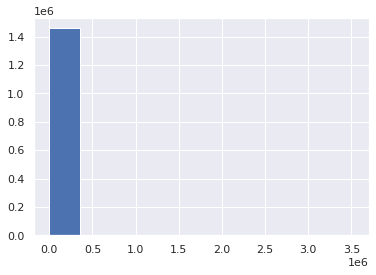

In [13]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
plt.hist(df_train['trip_duration'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


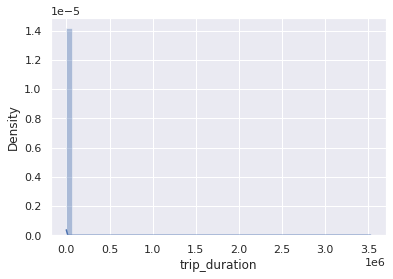

In [14]:
sns.distplot(df_train['trip_duration'])

plt.show()

**Вопрос**: Что можно сказать о целевой переменной по гистограмме её значений?

**Ответ:** Гистограмма получилась не особо красивой, потому что тут есть выбросы. Чтобы избавиться от этого, мы дальше будем строить распределение в логарифмической шкале.

В соревновании в качестве метрики качества использовалось RMSLE:
$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

**Вопрос**: Как вы думаете, почему авторы соревнования выбрали именно RMSLE, а не RMSE?

**Ответ:** Важное отличие RMLSE от RMSE: RMSLE имеет значение относительной ошибки, а RMSE абсолютной. В RMLSE масштаб ошибки не будет так сильно влиять на результат. Например, если длительность поездки составляет больше 30 минут, то RMLSE не будет так реагировать на ошибку в 1 минуту и в 2 минуты (тут эти ошибки можно считать равными), по сравнению с RMSE, где такая ошибка будет штрафоваться намного сильнее.

На семинаре мы рассматривали несколько моделей линейной регрессии в `sklearn`, но каждая из них оптимизировала среднеквадратичную ошибку (MSE), а не RMSLE. Давайте проделаем следующий трюк: будем предсказывать не целевую переменную, а ее *логарифм*. Обозначим $\hat{y}_i = \log{(y_i + 1)}$ — модифицированный таргет, а $\hat{a}(x_i)$ — предсказание модели, которая обучалась на $\hat{y}_i$, то есть логарифм таргета. Чтобы предсказать исходное значение, мы можем просто взять экспоненту от нашего предсказания: $a(x_i) = \exp(\hat{a}(x_i)) - 1$.

**Вопрос**: Покажите, что оптимизация RMSLE для модели $a$ эквивалентна оптимизации MSE для модели $\hat{a}$.

**Доказательство**: ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

$a(x_i) = \exp(\hat{a}(x_i)) - 1$ = \\"$\hat{a}(x_i)$ — предсказание модели, которая обучалась на $\hat{y}_i$, $\hat{y}_i = \log{(y_i + 1)}$"\\ = $\log{(\exp({a}(x_i)) - 1 + 1)} = {a}(x_i)$

Аналогично для $\hat{a}(x_i)$:

$\hat{a}(x_i) = \exp({a}(x_i)) - 1 = \log{(\exp(\hat{a}(x_i)) - 1 + 1)} = \hat{a}(x_i)$

Итак, мы смогли свести задачу оптимизации RMSLE к задаче оптимизации MSE, которую мы умеем решать! Кроме того, у логарифмирования таргета есть еще одно полезное свойство. Чтобы его увидеть, добавьте к нашей выборке колонку `log_trip_duration` (воспользуйтесь `np.log1p`) и нарисуйте гистограмму модифицированного таргета по обучающей выборке. Удалите колонку со старым таргетом.

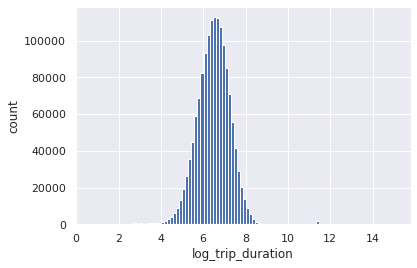

In [15]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df_train['log_trip_duration'] = np.log1p(df_train['trip_duration'].values)
plt.hist(df_train['log_trip_duration'], bins=100)
plt.xlabel('log_trip_duration')
plt.ylabel('count')
plt.show()

*Замечание:* получили более менее нормальное распределение, продолжительность поездки всегда находится в одном и том же интервале.

In [16]:
# удаляем колонку со старым таргетом так:
df_train.drop(columns=['trip_duration'])
# inplace=False потому что мне еще понадобится в будущем этот столбец

id  vendor_id     pickup_datetime  passenger_count  \
0        id2875421          2 2016-03-14 17:24:55                1   
1        id2377394          1 2016-06-12 00:43:35                1   
2        id3858529          2 2016-01-19 11:35:24                1   
3        id3504673          2 2016-04-06 19:32:31                1   
4        id2181028          2 2016-03-26 13:30:55                1   
...            ...        ...                 ...              ...   
1458639  id2376096          2 2016-04-08 13:31:04                4   
1458640  id1049543          1 2016-01-10 07:35:15                1   
1458641  id2304944          2 2016-04-22 06:57:41                1   
1458642  id2714485          1 2016-01-05 15:56:26                1   
1458643  id1209952          1 2016-04-05 14:44:25                1   

         pickup_longitude  pickup_latitude  dropoff_longitude  \
0              -73.982155        40.767937         -73.964630   
1              -73.980415        40.738564         -73.999481   
2              -73.979027        40.763939         -74.005333   
3              -74.010040        40.719971         -74.012268   
4              -73.973053        40.793209         -73.972923   
...                   ...              ...                ...   
1458639        -73.982201        40.745522         -73.994911   
1458640        -74.000946        40.747379         -73.970184   
1458641        -73.959129        40.768799         -74.004433   
1458642        -73.982079        40.749062         -73.974632   
1458643        -73.979538        40.781750         -73.972809   

         dropoff_latitude store_and_fwd_flag  log_trip_duration  
0               40.765602                  N           6.122493  
1               40.731152                  N           6.498282  
2               40.710087                  N           7.661527  
3               40.706718                  N           6.063785  
4               40.782520                  N           6.077642  
...                   ...                ...                ...  
1458639         40.740170                  N           6.658011  
1458640         40.796547                  N           6.486161  
1458641         40.707371                  N           6.639876  
1458642         40.757107                  N           5.924256  
1458643         40.790585                  N           5.293305  

[1458644 rows x 10 columns]

Чтобы иметь некоторую точку отсчета, давайте посчитаем значение метрики при наилучшем константном предсказании:

Из [источника](https://www.theyoungtechie.com/cm/neural-network-and-deep-learning/courses/advancedmachinelearningspecialization/kaggle_aml_week3/metrics-optimization/): "The best constant for (R)MSLE is the exponent of mean target value in log space".



In [17]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
import math

best_const = math.e**np.mean(np.log(df_train.log_trip_duration))
best_const

6.413305177556131

In [18]:
print('Значение метрики:', np.mean(np.log(df_train['trip_duration'])) - best_const)

Значение метрики: 0.0512159977115445


## Часть 1. Изучаем `pickup_datetime` (2 балла)

**Задание 2 (0.25 баллов)**. Для начала давайте посмотрим, сколько всего было поездок в каждый из дней. Постройте график зависимости количества поездок от дня в году (например, можно воспользоваться `sns.countplot`):

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'dependence')

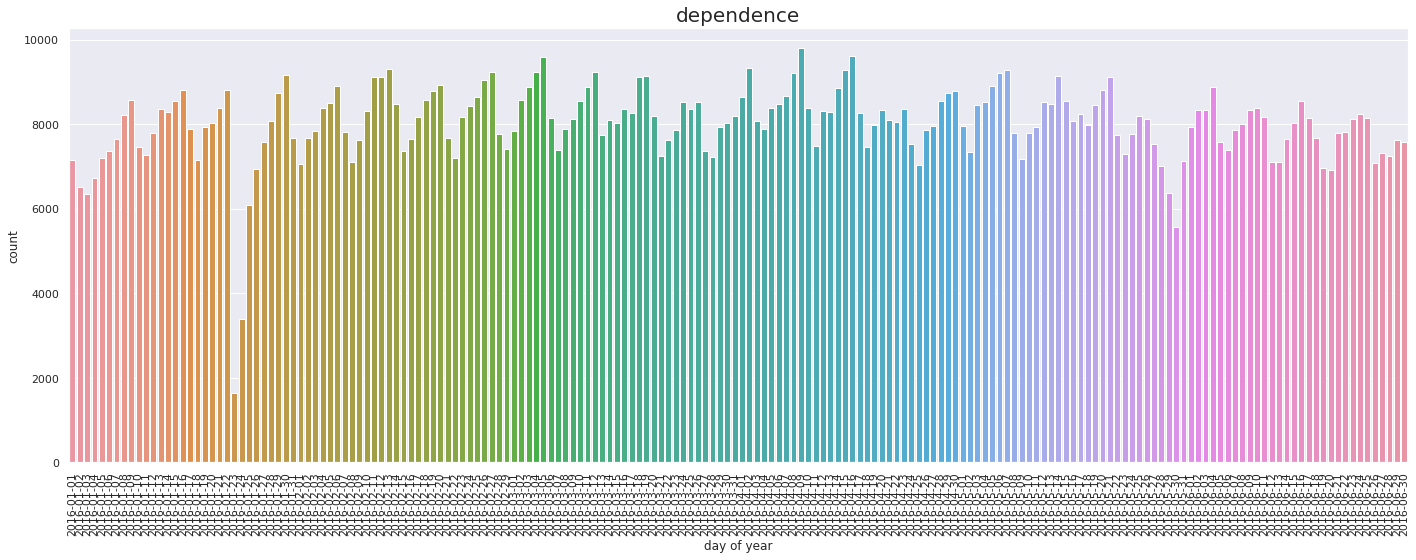

In [19]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
plt.figure(figsize=(24,8))

x = df_train['pickup_datetime'].dt.date
sns.countplot(sorted(x))

plt.xlabel('day of year')
plt.ylabel('count')
plt.xticks(rotation = 90)
plt.title('dependence', fontsize=20)

**Вопрос**: Вы, вероятно, заметили, что на графике есть 2 периода с аномально маленькими количествами поездок. Вычислите, в какие даты происходили эти скачки вниз и найдите информацию о том, что происходило в эти дни в Нью-Йорке.

Нарисуйте графики зависимости количества поездок от дня недели и от часов в сутках (воспользуйтесь `sns.relplot`):

In [20]:
df_train['pickup_datetime'].dt.date.value_counts()[-2:]

2016-01-24    3383
2016-01-23    1648
Name: pickup_datetime, dtype: int64

Причина: [власти запретили автомобильное движение в Нью-Йорке из-за снежной бури](https://ria.ru/20160123/1364032228.html).

Выделяется еще один период, но я не думаю, что его можно считать аномальным, так как количество поездок не настолько маленькое. Но все же выделю это период:

In [21]:
df_train['pickup_datetime'].dt.date.value_counts()[-3:]

2016-05-30    5570
2016-01-24    3383
2016-01-23    1648
Name: pickup_datetime, dtype: int64

30 мая: [Rain Event](https://www.weather.gov/okx/storm05302016) и [Memorial Day](https://brightonbeachnews.com/rus/день-поминовения-в-нью-йорке/).

Text(0.5, 1.0, 'dependence')

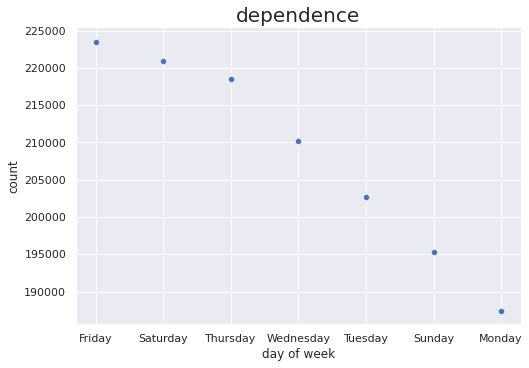

In [22]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
x = df_train['pickup_datetime'].dt.day_name().value_counts().index
y = df_train['pickup_datetime'].dt.day_name().value_counts()

sns.relplot(x = x, y = y, aspect=1.5)

plt.xlabel('day of week')
plt.ylabel('count')
plt.title('dependence', fontsize=20)

Text(0.5, 1.0, 'dependence')

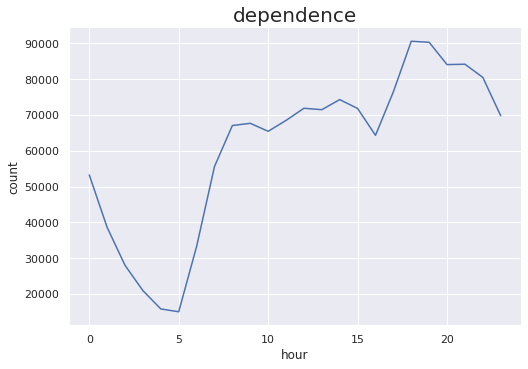

In [ ]:
x = df_train['pickup_datetime'].dt.hour.value_counts().index
y = df_train['pickup_datetime'].dt.hour.value_counts()
sns.relplot(x = x, y = y, aspect=1.5, kind='line')

plt.xlabel('hour')
plt.ylabel('count')
plt.title('dependence', fontsize=20)

**Задание 3 (0.5 баллов)**. Нарисуйте на одном графике зависимости количества поездок от часа в сутках для разных месяцев (разные кривые, соответствующие разным месяцам, окрашивайте в разные цвета, воспользуйтесь `hue` в `sns.relplot`). Аналогично нарисуйте зависимости количества поездок от часа в сутках для разных дней недели.

In [23]:
# создадим дополнительные столбцы
df_train['hour'] = df_train['pickup_datetime'].dt.hour
df_train['month'] = df_train['pickup_datetime'].dt.month
df_train['day_of_week'] = df_train['pickup_datetime'].dt.day_name()
df_train['day_of_year'] = df_train['pickup_datetime'].dt.date
df_train

id  vendor_id     pickup_datetime  passenger_count  \
0        id2875421          2 2016-03-14 17:24:55                1   
1        id2377394          1 2016-06-12 00:43:35                1   
2        id3858529          2 2016-01-19 11:35:24                1   
3        id3504673          2 2016-04-06 19:32:31                1   
4        id2181028          2 2016-03-26 13:30:55                1   
...            ...        ...                 ...              ...   
1458639  id2376096          2 2016-04-08 13:31:04                4   
1458640  id1049543          1 2016-01-10 07:35:15                1   
1458641  id2304944          2 2016-04-22 06:57:41                1   
1458642  id2714485          1 2016-01-05 15:56:26                1   
1458643  id1209952          1 2016-04-05 14:44:25                1   

         pickup_longitude  pickup_latitude  dropoff_longitude  \
0              -73.982155        40.767937         -73.964630   
1              -73.980415        40.738564         -73.999481   
2              -73.979027        40.763939         -74.005333   
3              -74.010040        40.719971         -74.012268   
4              -73.973053        40.793209         -73.972923   
...                   ...              ...                ...   
1458639        -73.982201        40.745522         -73.994911   
1458640        -74.000946        40.747379         -73.970184   
1458641        -73.959129        40.768799         -74.004433   
1458642        -73.982079        40.749062         -73.974632   
1458643        -73.979538        40.781750         -73.972809   

         dropoff_latitude store_and_fwd_flag  trip_duration  \
0               40.765602                  N            455   
1               40.731152                  N            663   
2               40.710087                  N           2124   
3               40.706718                  N            429   
4               40.782520                  N            435   
...                   ...                ...            ...   
1458639         40.740170                  N            778   
1458640         40.796547                  N            655   
1458641         40.707371                  N            764   
1458642         40.757107                  N            373   
1458643         40.790585                  N            198   

         log_trip_duration  hour  month day_of_week day_of_year  
0                 6.122493    17      3      Monday  2016-03-14  
1                 6.498282     0      6      Sunday  2016-06-12  
2                 7.661527    11      1     Tuesday  2016-01-19  
3                 6.063785    19      4   Wednesday  2016-04-06  
4                 6.077642    13      3    Saturday  2016-03-26  
...                    ...   ...    ...         ...         ...  
1458639           6.658011    13      4      Friday  2016-04-08  
1458640           6.486161     7      1      Sunday  2016-01-10  
1458641           6.639876     6      4      Friday  2016-04-22  
1458642           5.924256    15      1     Tuesday  2016-01-05  
1458643           5.293305    14      4     Tuesday  2016-04-05  

[1458644 rows x 15 columns]

In [24]:
tmp = pd.DataFrame(df_train[['month','hour', 'day_of_week']])
tmp

month  hour day_of_week
0            3    17      Monday
1            6     0      Sunday
2            1    11     Tuesday
3            4    19   Wednesday
4            3    13    Saturday
...        ...   ...         ...
1458639      4    13      Friday
1458640      1     7      Sunday
1458641      4     6      Friday
1458642      1    15     Tuesday
1458643      4    14     Tuesday

[1458644 rows x 3 columns]

Text(0.5, 1.0, 'dependence')

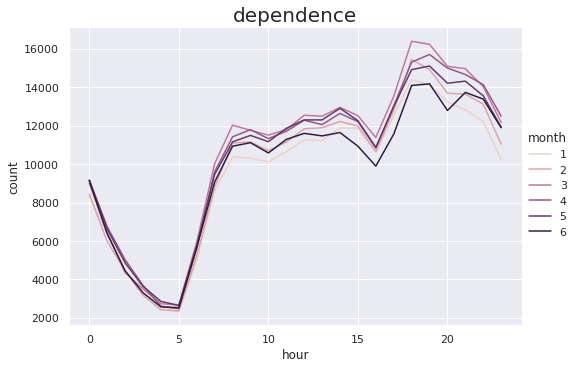

In [25]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
# в этом случае при группировке по месяцу и часу количество одинаковых строк будет записываться в колонку day_of_week
sns.relplot(hue = 'month', x = 'hour', y = 'day_of_week', data = tmp.groupby(['month', 'hour']).count(), kind = 'line', aspect=1.5)

plt.xlabel('hour')
plt.ylabel('count')
plt.title('dependence', fontsize=20)

Text(0.5, 1.0, 'dependence')

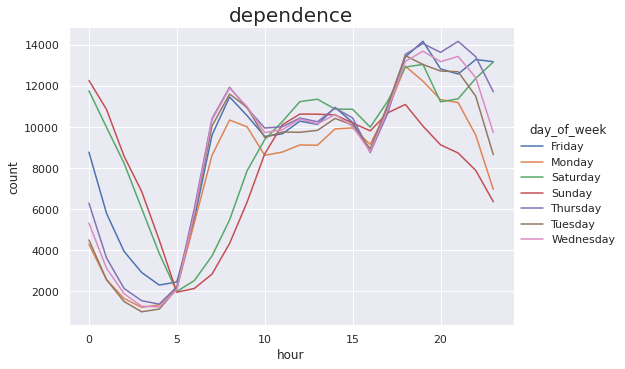

In [26]:
# в этом случае при группировке по дню недели и часу количество одинаковых строк будет записываться в колонку month
sns.relplot(hue = 'day_of_week', x = 'hour', y = 'month', data = tmp.groupby(['day_of_week', 'hour']).count(), kind = 'line', aspect=1.5)

plt.xlabel('hour')
plt.ylabel('count')
plt.title('dependence', fontsize=20)

**Вопрос**: Какие выводы можно сделать, основываясь на графиках выше? Выделяются ли какие-нибудь дни недели? Месяца? Время суток? С чем это связано?


**Ответ:** Месяца практичестки не отличаются, дни недели имеют небольшие отличия. Например, можно заметить, что по субботам и воскресеньям люди просыпаются позже (логично, так как это выходные). Также в будние дни возрастает количество поездок после 5 утра (люди едут на работу) и после ~4 вечера (люди едут после работы).

**Задание 4 (0.5 баллов)**. Разбейте выборку на обучающую и тестовую в отношении 7:3. По обучающей выборке нарисуйте график зависимости среднего логарифма времени поездки от дня недели. Затем сделайте то же самое, но для часа в сутках и дня в году.

In [27]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_train, test_size=0.3)

Text(0.5, 1.0, 'dependence')

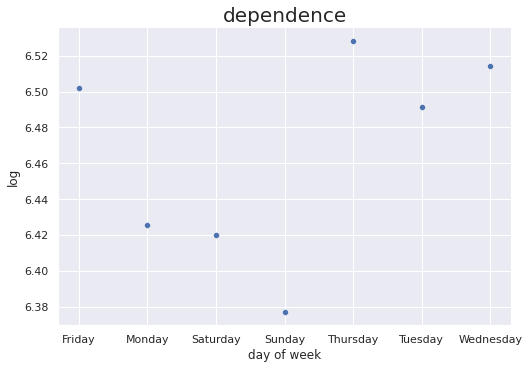

In [28]:
x = train.groupby('day_of_week')['log_trip_duration'].mean().index
y = train.groupby('day_of_week')['log_trip_duration'].mean()

sns.relplot(x = x, y = y, aspect=1.5)

plt.xlabel('day of week')
plt.ylabel('log')
plt.title('dependence', fontsize=20)

Text(0.5, 1.0, 'dependence')

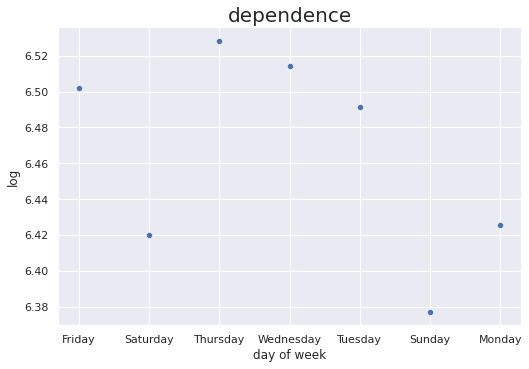

In [29]:
# сделаем так, чтоб дни недели были в том же порядке, что и на прошлых графиках
x = df_train['pickup_datetime'].dt.day_name().value_counts().index
y = list()

for day in df_train['pickup_datetime'].dt.day_name().value_counts().index:
  y.append(train[train['day_of_week'] == day]['log_trip_duration'].mean())

sns.relplot(x = x, y = y, aspect=1.5)

plt.xlabel('day of week')
plt.ylabel('log')
plt.title('dependence', fontsize=20)

Text(0.5, 1.0, 'dependence')

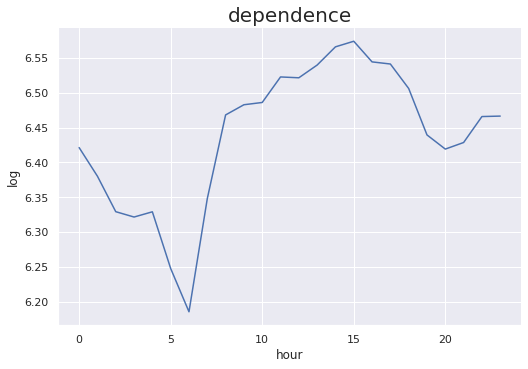

In [30]:
x = train.groupby('hour')['log_trip_duration'].mean().index
y = train.groupby('hour')['log_trip_duration'].mean()

sns.relplot(x = x, y = y, aspect=1.5, kind='line')

plt.xlabel('hour')
plt.ylabel('log')
plt.title('dependence', fontsize=20)

Text(0.5, 1.0, 'dependence')

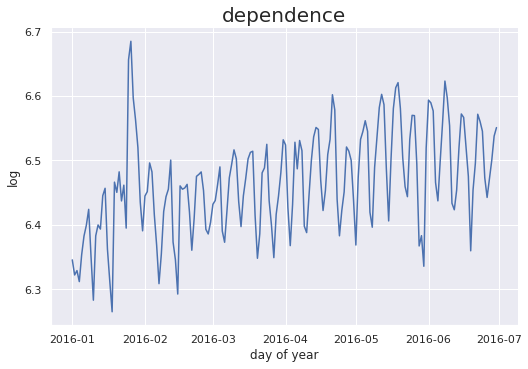

In [31]:
x = train.groupby('day_of_year')['log_trip_duration'].mean().index
y = train.groupby('day_of_year')['log_trip_duration'].mean()

sns.relplot(x = x, y = y, aspect=1.5, kind='line')

plt.xlabel('day of year')
plt.ylabel('log')
plt.title('dependence', fontsize=20)

**Вопрос**: Похожи ли графики зависимости таргета от дня недели и от часа в сутках на аналогичные графики для количества поездок? Почему? Что происходит со средним таргетом в те два аномальных периода, что мы видели выше? Почему так происходит? Наблюдаете ли вы какой-нибудь тренд на графике зависимости `log_trip_duration` от номера дня в году?

**Ответ:** График зависимости таргета от часа в сутках похож на график зависимости для количества поездок. Возможно, так произошло, потому что ночью не особо много поездок, а также их длительность оказалась меньше, так как ночью, во-первых, не так много пробок, как днем, во-вторых, люди реже ездят на большое расстояние. Днем же количество поездок возрастает (люди просыпаются), следовательно возникают пробки, что увеличивает продолжительность поездки, и появляется больше заказов на большие расстояния.

С графиком зависимости таргета от дня недели так не сработало. Ну тут сложно вообще придумать, какая может быть зависимость. Единственное, что я придумала: по графикам заметно, что в пятнциу очень много поездок, а также их продолжительность высока; так происходит, потому что люди могут на выходные уезжать за пределы города; однако эта теория ломается в воскресенье, потому что по идее люди должны возвращаться в город, и продолжительность поездок должна вырастать, но этого не происходит. В общем и целом тут никакой зависимости я не заметила.

По графикам зависимости таргета от дня в году можно заметить, что в те два аномальных периода средний таргет очень сильно вырос. Может быть это произошло из-за сторонних факторов в тот день, потому что тогда была снежная буря, и в такую погоду просто не получится быстро передвигаться => среднее время поездки выросло. 

Тренд на графике зависимости `log_trip_duration` от номера дня в году вроде как восходящий.

Добавьте следующие признаки на основе `pickup_datetime`:
1. День недели
2. Месяц
3. Час
4. Является ли период аномальным (два бинарных признака, соответствующие двум аномальным периодам)
5. Номер дня в году

In [32]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
# первые три пункта я выполнила ранее, так что сделаем оставшиеся
train['is_bad'] = 0
train.loc[train['pickup_datetime'].dt.date.isin(train['pickup_datetime'].dt.date.value_counts()[-2:].index),'is_bad'] = 1

train['day_of_year'] = train['pickup_datetime'].dt.dayofyear

test['is_bad'] = 0
test.loc[test['pickup_datetime'].dt.date.isin(test['pickup_datetime'].dt.date.value_counts()[-2:].index),'is_bad'] = 1

test['day_of_year'] = test['pickup_datetime'].dt.dayofyear

Итак, мы уже создали некоторое количество признаков.

**Вопрос**: Какие из признаков стоит рассматривать как категориальные, а какие - как численные? Почему?

**Ответ:** Номер дня в году можно счиать численным признаком. Месяц сложно как-то соотнести к численным признакам, поэтому скорее это категориальный (нельзя будет сказать, что апрель больше января). День недели тоже категориальный, так как нельзя выявить схему, как их сравнивать. Час можно считать численным признаком, так как тут вроде можно сравнить несколько поездок (но учитывая момент, когда мы сравниваем, например, 11 часов вечера и 1 час ночи одного дня и разных дней, потому что в один день 11 часов будет больше 1 часа ночи, а в разные дни может быть и наоборот). Лучше час рассматривать как категориальный признак, потому что то, что час больше, не гарантирует, что поездка будет дольше.

**Задание 5 (0.75 баллов)**. Обучите `Ridge`-регрессию с параметрами по умолчанию, закодировав все категориальные признаки с помощью `OneHotEncoder`. Численные признаки отмасштабируйте с помощью `StandardScaler`. Используйте только признаки, которые мы выделили в этой части задания.

In [33]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
# распишем выборку
X_train = train.drop(['log_trip_duration'], axis=1)[['hour', 'day_of_year', 'day_of_week','month','is_bad']]
X_test = test.drop(['log_trip_duration'], axis=1)[['hour', 'day_of_year', 'day_of_week','month','is_bad']]
y_train = train['log_trip_duration']
y_test = test['log_trip_duration']

Сделаем как на семинаре:

In [34]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

notnum_feats = ['hour', 'day_of_week','month','is_bad']
num_feats = ['day_of_year']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), notnum_feats),
    ('scaling', StandardScaler(), num_feats)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))
print("Test MSE = %.4f" % mean_squared_error(y_test, y_pred))

y_train_pred = model.predict(X_train)
print("Train RMSE = %.4f" % mean_squared_error(y_train, y_train_pred, squared=False))
print("Train MSE = %.4f" % mean_squared_error(y_train, y_train_pred))

Test RMSE = 0.7912
Test MSE = 0.6260
Train RMSE = 0.7879
Train MSE = 0.6208


## Часть 2. Изучаем координаты (3 балла)
Мы уже очень хорошо изучили данные о времени начала поездки, давайте теперь посмотрим на информацию о координатах начала и конца поездки. Мы подготовили для вас функцию, которая на карте рисует точки начала или конца поездки. Примеры ее вызова вы найдете ниже. Обратите внимание, что в эту функцию мы передаем лишь небольшой кусочек данных, посколько иначе функция будет работать очень долго

In [35]:
def show_circles_on_map(data, latitude_column, longitude_column, color):
    """
    The function draws map with circles on it.
    The center of the map is the mean of coordinates passed in data.
    
    data: DataFrame that contains columns latitude_column and longitude_column
    latitude_column: string, the name of column for latitude coordinates
    longitude_column: string, the name of column for longitude coordinates
    color: string, the color of circles to be drawn
    """

    location = (data[latitude_column].mean(), data[longitude_column].mean())
    m = folium.Map(location=location)

    for _, row in data.iterrows():
        folium.Circle(
            radius=100,
            location=(row[latitude_column], row[longitude_column]),
            color=color,
            fill_color=color,
            fill=True
        ).add_to(m)

    return m

In [36]:
show_circles_on_map(df_train.sample(1000), "pickup_latitude", "pickup_longitude", "blue")

In [37]:
show_circles_on_map(df_train.sample(1000), "dropoff_latitude", "dropoff_longitude", "blue")

**Вопрос**: Какие две точки выделяются на карте?

**Ответ:** Явно выделяются национальный аэропорт имени Джона Кеннеди и аэропорт Ла-Гуардия.

**Задание 6 (0.75 балл)**. Как мы все прекрасно помним, $t = s / v_{\text{ср}}$, поэтому очевидно, что самым сильным признаком будет расстояние, которое необходимо проехать. Мы не можем посчитать точное расстояние, которое необходимо преодолеть такси, но мы можем его оценить, посчитав кратчайшее расстояние между точками начала и конца поездки. Чтобы корректно посчитать расстояние между двумя точками на Земле, можно использовать функцию `haversine`. Также можно воспользоваться кодом с первого семинара. Посчитайте кратчайшее расстояние для объектов и запишите его в колонку `haversine`:

In [38]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
# с семинара
def haversine_array(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

Так как мы предсказываем логарифм времени поездки и хотим, чтобы наши признаки были линейно зависимы с этой целевой переменной, нам нужно логарифмировать расстояние: $\log t = \log s - \log{v_{\text{ср}}}$. Запишите логарифм `haversine` в отдельную колонку:

In [39]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
train['log_haversine'] = np.log1p(haversine_array(train.pickup_longitude, train.pickup_latitude, train.dropoff_longitude, train.dropoff_latitude))
train['haversine'] = haversine_array(train.pickup_longitude, train.pickup_latitude, train.dropoff_longitude, train.dropoff_latitude)

test['log_haversine'] = np.log1p(haversine_array(test.pickup_longitude, test.pickup_latitude, test.dropoff_longitude, test.dropoff_latitude))
test['haversine'] = haversine_array(test.pickup_longitude, test.pickup_latitude, test.dropoff_longitude, test.dropoff_latitude)

Убедимся, что логарифм расстояния лучше коррелирует с нашим таргетом, чем просто расстояние:

In [40]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
train.loc[:,['log_haversine','log_trip_duration','haversine']].corr().iloc[[0,2],[1]]

log_trip_duration
log_haversine           0.675776
haversine               0.512573

**Задание 7 (0.75 балла)**. Давайте изучим среднюю скорость движения такси. Посчитайте среднюю скорость для каждого объекта обучающей выборки, разделив `haversine` на `trip_duration`, и нарисуйте гистограмму ее распределения

In [41]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ 
train['velocity'] = (train['haversine']) / (train['trip_duration'])

test['velocity'] = (test['haversine']) / (test['trip_duration'])

(array([1.021031e+06, 1.000000e+01, 3.000000e+00, 2.000000e+00,
        1.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        1.000000e+00, 2.000000e+00]),
 array([0.        , 0.14232093, 0.28464185, 0.42696278, 0.56928371,
        0.71160464, 0.85392556, 0.99624649, 1.13856742, 1.28088835,
        1.42320927]),
 <a list of 10 Patch objects>)

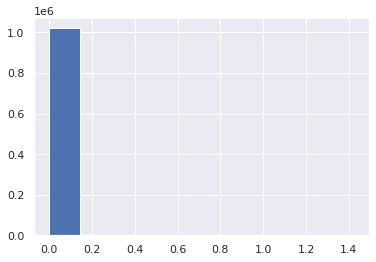

In [42]:
plt.hist(train['velocity'])

Как можно видеть по гистограмме, для некоторых объектов у нас получились очень больше значения скоростей. Нарисуйте гистограмму по объектам, для которых значение скорости получилось разумным (например, можно не включать рассмотрение объекты, где скорость больше некоторой квантили):

(array([ 41257., 146146., 162527., 155788., 138267., 110222.,  78647.,
         53307.,  35960.,  24960.]),
 array([0.        , 0.00066068, 0.00132137, 0.00198205, 0.00264273,
        0.00330342, 0.0039641 , 0.00462479, 0.00528547, 0.00594615,
        0.00660684]),
 <a list of 10 Patch objects>)

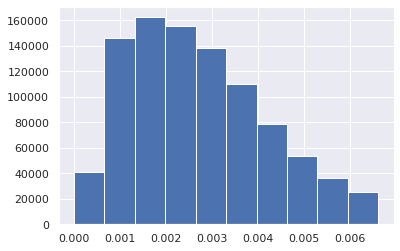

In [43]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
tmp = train[train['velocity'] < train['velocity'].mean() + train['velocity'].std()]
plt.hist(tmp['velocity'])

Для каждой пары (день недели, час суток) посчитайте медиану скоростей. Нарисуйте с помощью `sns.heatmap` график, где по осям будут дни недели и часы, а в качестве значения функции - медиана скорости

In [44]:
tmp = list(list())
tmp.append(train[train['day_of_week'] == 'Monday'].groupby(['hour']).median().velocity)
tmp.append(train[train['day_of_week'] == 'Tuesday'].groupby(['hour']).median().velocity)
tmp.append(train[train['day_of_week'] == 'Wednesday'].groupby(['hour']).median().velocity)
tmp.append(train[train['day_of_week'] == 'Thursday'].groupby(['hour']).median().velocity)
tmp.append(train[train['day_of_week'] == 'Friday'].groupby(['hour']).median().velocity)
tmp.append(train[train['day_of_week'] == 'Saturday'].groupby(['hour']).median().velocity)
tmp.append(train[train['day_of_week'] == 'Sunday'].groupby(['hour']).median().velocity)

Text(336.5, 0.5, 'day of week')

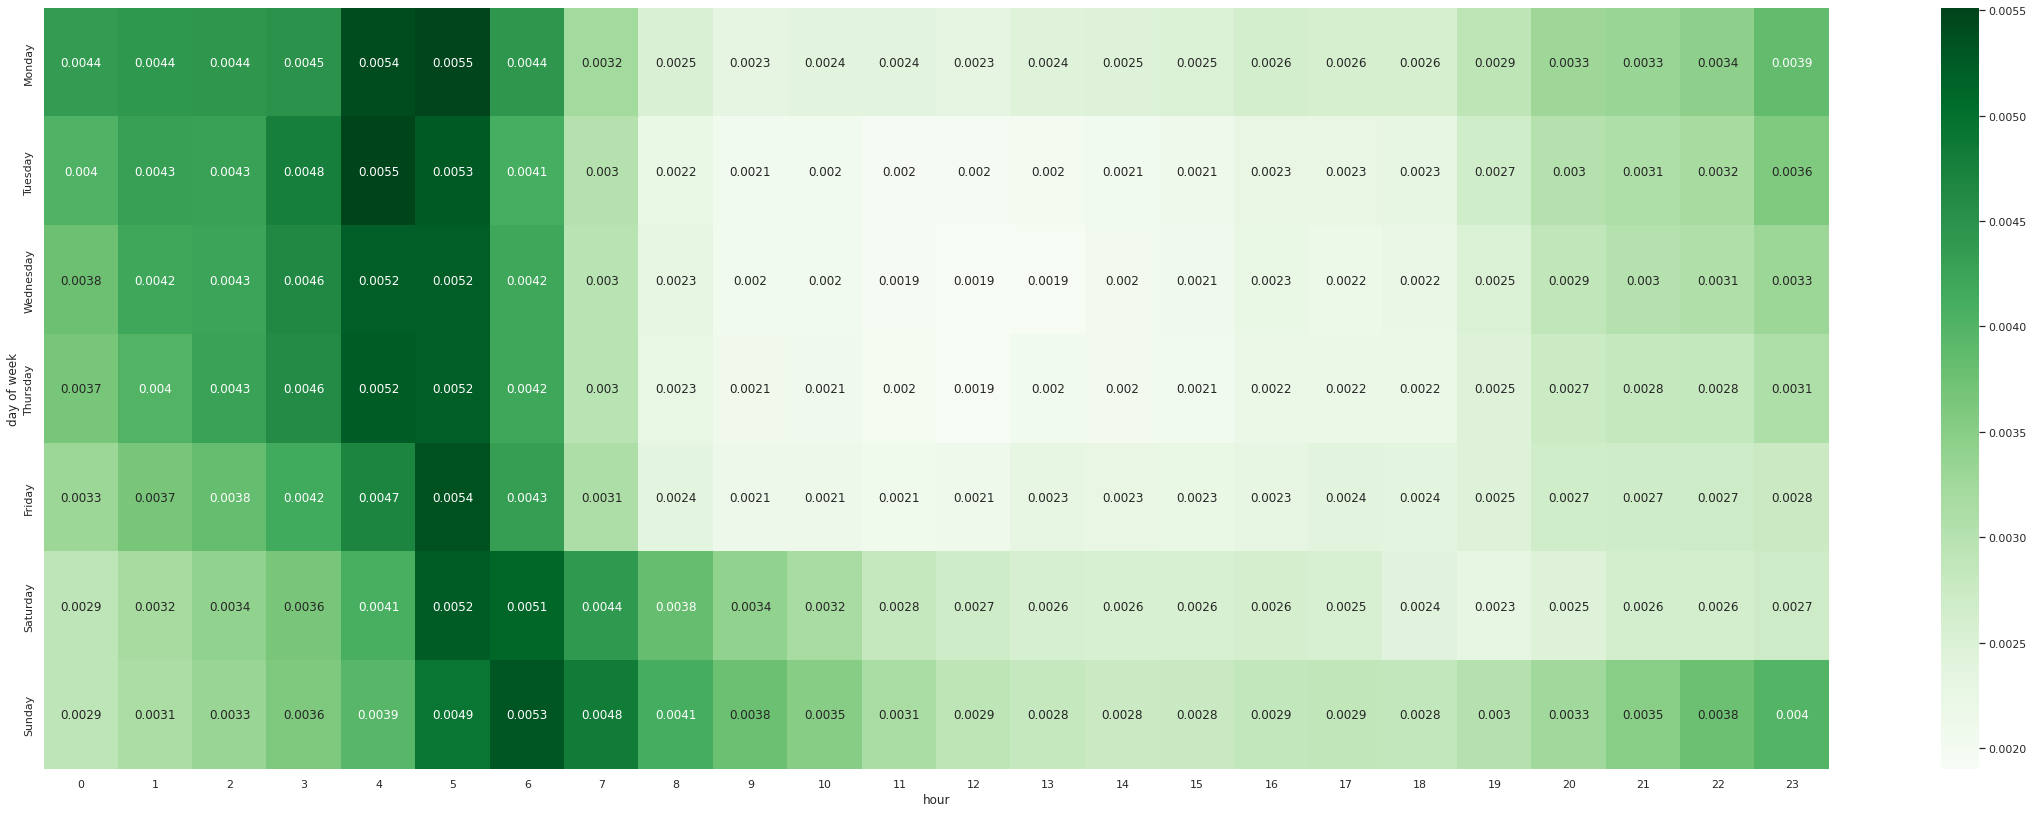

In [45]:
sns.set(rc={'figure.figsize':(40,14)})

plt.xticks(train['hour'].unique())
sns.heatmap(tmp, cmap='Greens', annot=True, yticklabels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.xlabel("hour")
plt.ylabel("day of week")

Не забудьте удалить колонку со значением скорости из данных!

**Вопрос**: Почему значение скорости нельзя использовать во время обучения?

**Ответ:** Потому что через скорость мы сразу можем получить таргет, а значит нет смысла в обучении модели, так как мы грубо говоря даем ей значение, которое надо найти. А также мы не можем для тестовой выборки понять скорость, так как у нас нет значения расстояния (которое мы и должны предсказать). Поэтому мы не можем использовать этот признак.

In [46]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
train.drop('velocity', inplace = True, axis=1)

test.drop('velocity', inplace = True, axis=1)

**Вопрос**: Посмотрите внимательно на график и скажите, в какие моменты времени скорость минимальна; максимальна.

Создайте признаки "поездка совершается в период пробок" и "поездка совершается в период свободных дорог" (естественно, они не должен зависеть от скорости!):

**Ответ:** Скорость минимальна: 1) сб: с 13 до 22; 2) будние: с 8 до 19. (самые светлые на графике)

В остальное время скорость максимальна.

In [47]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
train['is_slow'] = 0
train.loc[(train['hour'] > 13) & (train['hour'] < 22) & (train['day_of_week'] != 'Saturday'), 'is_slow'] = 1
train.loc[((train['hour'] > 8) & (train['hour'] < 19) & (train['day_of_week'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']))), 'is_slow'] = 1

test['is_slow'] = 0
test.loc[(test['hour'] > 13) & (test['hour'] < 22) & (test['day_of_week'] != 'Saturday'), 'is_slow'] = 1
test.loc[((test['hour'] > 8) & (test['hour'] < 19) & (test['day_of_week'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']))), 'is_slow'] = 1

**Задание 8 (0.25 балла)**. Как уже было замечено выше, на карте выделяются две точки вдали от Манхэттена. Для каждой из них добавьте в выборку два признака: началась ли поездка в ней и закончилась ли она в ней.

In [48]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
train['airport_start'] = 0
train['airport_finish'] = 0

test['airport_start'] = 0
test['airport_finish'] = 0

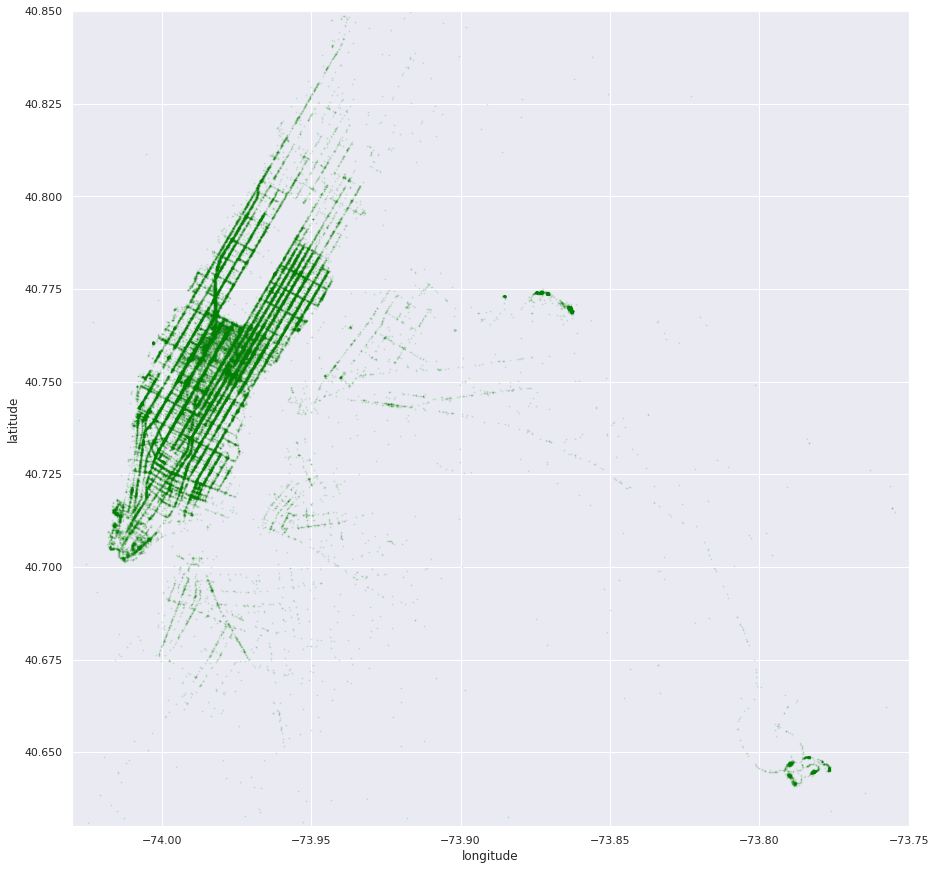

In [49]:
# с семинара
N = 100000
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)
plt.figure(figsize=(15,15))
plt.scatter(train['pickup_longitude'].values[:N], train['pickup_latitude'].values[:N],
              color='green', s=1, label='train', alpha=0.1)
plt.ylabel('latitude')
plt.xlabel('longitude')
plt.ylim(city_lat_border)
plt.xlim(city_long_border)
plt.show()

Наши две аномальные точки явно видно, и мы можем выделить границы по долготе и широте для них.

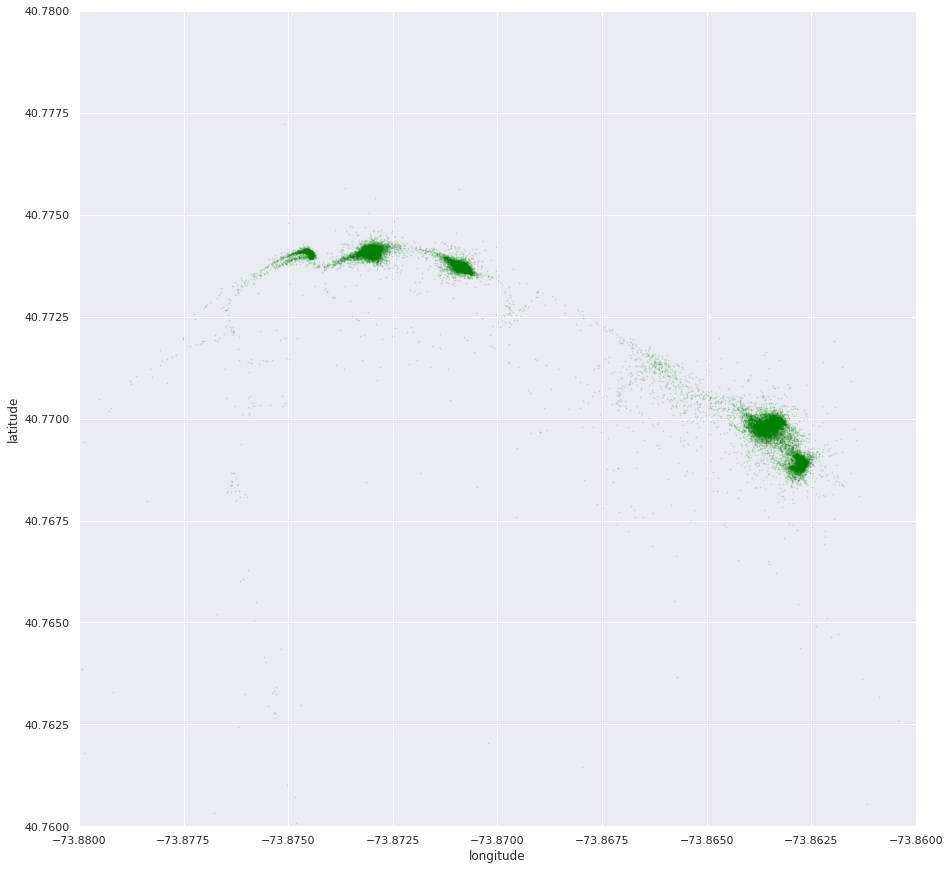

In [50]:
# 1й аэропорт (меняем только координаты для рисунка)
N = 1000000
city_long_border = (-73.88, -73.86)
city_lat_border = (40.76, 40.78)

plt.figure(figsize=(15,15))
plt.scatter(train['pickup_longitude'].values[:N], train['pickup_latitude'].values[:N],
              color='green', s=1, label='train', alpha=0.1)
plt.ylabel('latitude')
plt.xlabel('longitude')
plt.ylim(city_lat_border)
plt.xlim(city_long_border)
plt.show()

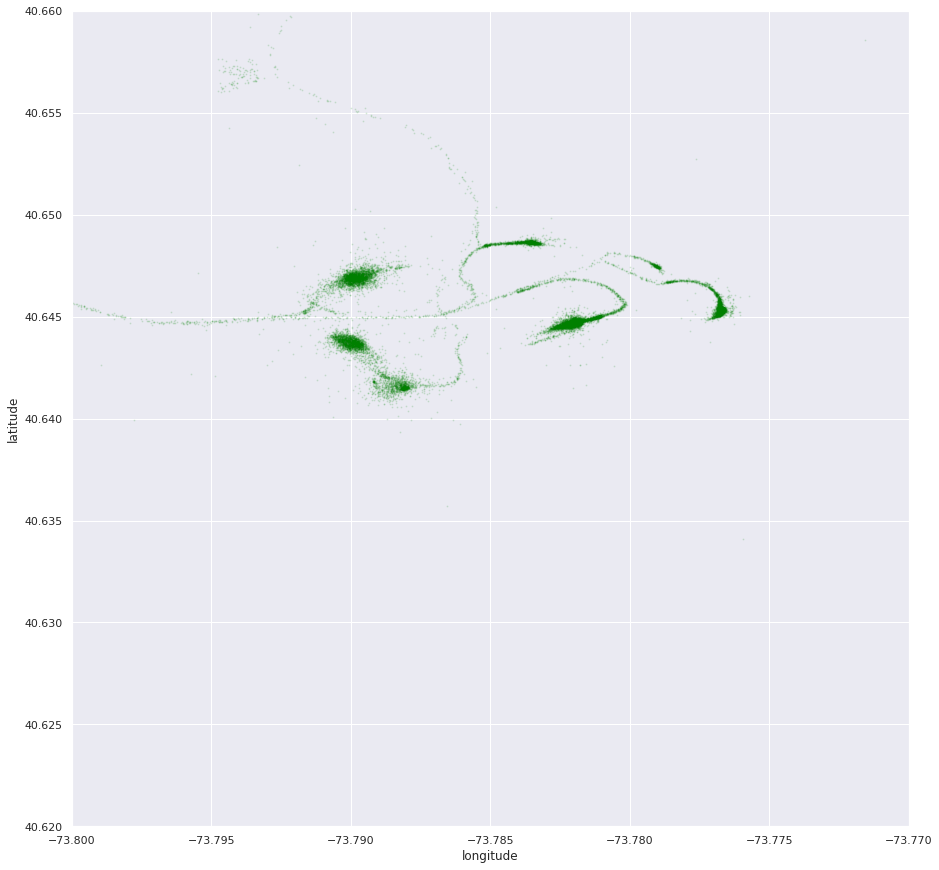

In [51]:
# 2й аэропорт
N = 1000000
city_long_border = (-73.8, -73.77)
city_lat_border = (40.62, 40.66)

plt.figure(figsize=(15,15))
plt.scatter(train['pickup_longitude'].values[:N], train['pickup_latitude'].values[:N],
              color='green', s=1, label='train', alpha=0.1)
plt.ylabel('latitude')
plt.xlabel('longitude')
plt.ylim(city_lat_border)
plt.xlim(city_long_border)
plt.show()

Теперь уже по координатам можем присваивать значение столбца.

In [52]:
def f1(lat,lon):
  return ((40.62 < df_train[lat]) & (df_train[lat] < 40.66) & (-73.8 < df_train[lon]) & (df_train[lon] < -73.77))
  
def f2(lat,lon):
  return ((40.76 < df_train[lat]) & (df_train[lat] < 40.78) & (-73.88 < df_train[lon]) & (df_train[lon] < -73.86))

In [53]:
train.loc[(f1('pickup_latitude','pickup_longitude')), 'airport_start'] = 1
train.loc[(f2('pickup_latitude','pickup_longitude')), 'airport_start'] = 2

train.loc[(f1('dropoff_latitude','dropoff_longitude')), 'airport_finish'] = 1
train.loc[(f2('dropoff_latitude','dropoff_longitude')), 'airport_finish'] = 2

test.loc[(f1('pickup_latitude','pickup_longitude')), 'airport_start'] = 1
test.loc[(f2('pickup_latitude','pickup_longitude')), 'airport_start'] = 2

test.loc[(f1('dropoff_latitude','dropoff_longitude')), 'airport_finish'] = 1
test.loc[(f2('dropoff_latitude','dropoff_longitude')), 'airport_finish'] = 2


Эта колонка будет выглядеть так: 

У меня 2 колонки:
airport_start, airport_finish.


Например, для первой значения 0, 1 или 2:

0 - движение началось не в аэропорту,

1 - началось в первом аэропорту,

2 - началось во втором аэропорту. 

И аналогично для airport_finish.

Для каждого из созданных признаков нарисуйте "ящик с усами" (`sns.boxplot`) распределения логарифма времени поездки

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


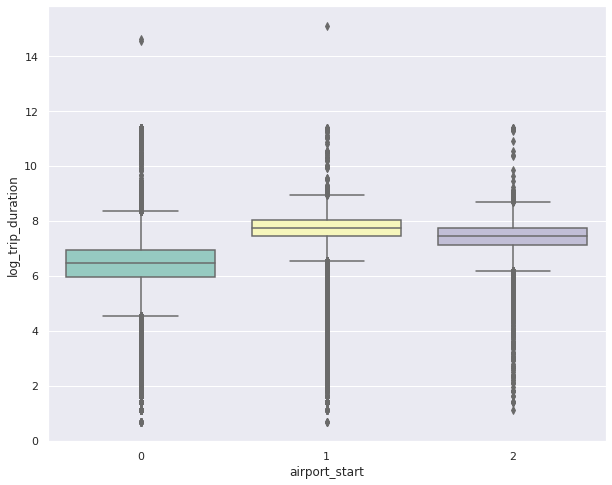

In [54]:
plt.rcParams['figure.figsize'] = 10, 8
sns.boxplot(train['airport_start'], y = train['log_trip_duration'], palette="Set3", data = train)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


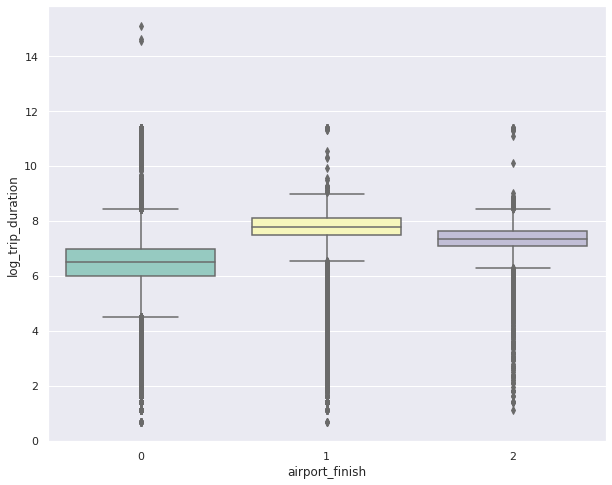

In [55]:
plt.rcParams['figure.figsize'] = 10, 8
sns.boxplot(train['airport_finish'], y = train['log_trip_duration'], palette="Set3", data = train)

**Вопрос**: судя по графикам, как вы думаете, хорошими ли получились эти признаки?

**Ответ:** Длительность поездок, которые начинаются или заканчиваются в аэропортах, больше, чем у других. Это логично, поэтому будем считать признаки хорошими.

<img src="https://www.dropbox.com/s/xson9nukz5hba7c/map.png?raw=1" align="right" width="20%" style="margin-left: 20px; margin-bottom: 20px">

**Задание 9 (1 балл)**. Сейчас мы почти что не используем сами значения координат. На это есть несколько причин: по отдельности рассматривать широту и долготу не имеет особого смысла, стоит рассматривать их вместе. Во-вторых, понятно, что зависимость между нашим таргетом и координатами не линейная. Чтобы как-то использовать координаты, можно прибегнуть к следующему трюку: обрамим область с наибольшим количеством поездок прямоугольником (как на рисунке). Разобьем этот прямоугольник на ячейки. Каждой точке сопоставим номер ее ячейки, а тем точкам, что не попали ни в одну из ячеек, сопоставим значение -1.

Напишите трансформер, который сначала разбивает показанную на рисунке область на ячейки, а затем создает два признака: номер ячейки, в которой началась поездка, и номер ячейки, в которой закончилась поездка. Количество строк и столбцов выберите самостоятельно.

Обратите внимание, что все вычисления должны быть векторизованными, трансформер не должен модифицировать передаваемую ему выборку inplace, а все необходимые статистики (если они вдруг нужны) нужно считать только по обучающей выборке в методе `fit`:

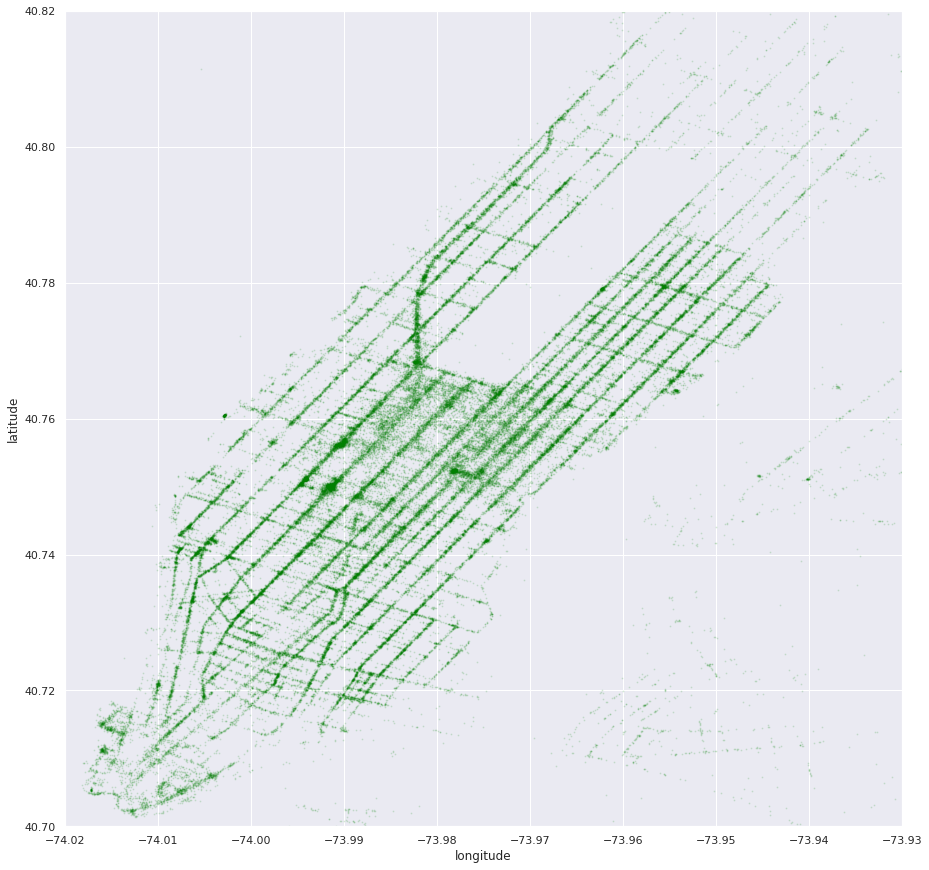

In [56]:
# часть карты, где много поездок
N = 100000
city_long_border = (-74.02, -73.93)
city_lat_border = (40.70, 40.82)
plt.figure(figsize=(15,15))
plt.scatter(train['pickup_longitude'].values[:N], train['pickup_latitude'].values[:N],
              color='green', s=1, label='train', alpha=0.1)
plt.ylabel('latitude')
plt.xlabel('longitude')
plt.ylim(city_lat_border)
plt.xlim(city_long_border)
plt.show()

In [63]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import LabelEncoder

# TransformerMixin implements fit_transform for you,
# applying your fit and transform consistently
    
class MapGridTransformer(BaseEstimator, TransformerMixin):
    #def __init__(self, ...):
    #    pass
    
    def show_map(self, X=None):
        map = show_circles_on_map(train.sample(1000), "pickup_latitude", "pickup_longitude", "blue")

        line_1 = [(40.82, -74.02), (40.82, -73.93)]
        folium.PolyLine(line_1, color = 'red', weight=5).add_to(map)

        line_2 = [(40.79, -74.02), (40.79, -73.93)]
        folium.PolyLine(line_2, color = 'red', weight=5).add_to(map)

        line_3 = [(40.76, -74.02), (40.76, -73.93)]
        folium.PolyLine(line_3, color = 'red', weight=5).add_to(map)

        line_4 = [(40.73, -74.02), (40.73, -73.93)]
        folium.PolyLine(line_4, color = 'red', weight=5).add_to(map)

        line_5 = [(40.70, -74.02), (40.70, -73.93)]
        folium.PolyLine(line_5, color = 'red', weight=5).add_to(map)

        line_6 = [(40.82, -74.02), (40.70, -74.02)]
        folium.PolyLine(line_6, color = 'red', weight=5).add_to(map)

        line_7 = [(40.82, -73.99), (40.70, -73.99)]
        folium.PolyLine(line_7, color = 'red', weight=5).add_to(map)

        line_8 = [(40.82, -73.96), (40.70, -73.96)]
        folium.PolyLine(line_8, color = 'red', weight=5).add_to(map)

        line_9 = [(40.82, -73.93), (40.70, -73.93)]
        folium.PolyLine(line_9, color = 'red', weight=5).add_to(map)
        
        return map
      
    def fit(self, X=None, y=None):
        # your code here
        self.X = X.copy()

        self.X['grid_first'] = -1
        self.X['grid_second'] = -1

        # да, это выглядит страшно, но я разбила на квадратики руками (12 квадратиков)

        self.mask_of_square1_f = [((self.X['pickup_latitude'] > 40.79) & (self.X['pickup_latitude'] < 40.82) & (self.X['pickup_longitude'] > -74.02) & (self.X['pickup_longitude'] <= -73.99))]
        self.mask_of_square1_s = [((self.X['dropoff_latitude'] > 40.79) & (self.X['dropoff_latitude'] < 40.82) & (self.X['dropoff_longitude'] > -74.02) & (self.X['dropoff_longitude'] <= -73.99))]

        self.mask_of_square2_f = [((self.X['pickup_latitude'] > 40.79) & (self.X['pickup_latitude'] < 40.82) & (self.X['pickup_longitude'] > -73.99) & (self.X['pickup_longitude'] <= -73.96))]
        self.mask_of_square2_s = [((self.X['dropoff_latitude'] > 40.79) & (self.X['dropoff_latitude'] < 40.82) & (self.X['dropoff_longitude'] > -73.99) & (self.X['dropoff_longitude'] <= -73.96))]

        self.mask_of_square3_f = [((self.X['pickup_latitude'] > 40.79) & (self.X['pickup_latitude'] < 40.82) & (self.X['pickup_longitude'] > -73.96) & (self.X['pickup_longitude'] <= -73.93))]
        self.mask_of_square3_s = [((self.X['dropoff_latitude'] > 40.79) & (self.X['dropoff_latitude'] < 40.82) & (self.X['dropoff_longitude'] > -73.96) & (self.X['dropoff_longitude'] <= -73.93))]

        self.mask_of_square4_f = [((self.X['pickup_latitude'] > 40.76) & (self.X['pickup_latitude'] <= 40.79) & (self.X['pickup_longitude'] > -74.02) & (self.X['pickup_longitude'] <= -73.99))]
        self.mask_of_square4_s = [((self.X['dropoff_latitude'] > 40.76) & (self.X['dropoff_latitude'] <= 40.79) & (self.X['dropoff_longitude'] > -74.02) & (self.X['dropoff_longitude'] <= -73.99))]

        self.mask_of_square5_f = [((self.X['pickup_latitude'] > 40.76) & (self.X['pickup_latitude'] <= 40.79) & (self.X['pickup_longitude'] > -73.99) & (self.X['pickup_longitude'] <= -73.96))]
        self.mask_of_square5_s = [((self.X['dropoff_latitude'] > 40.76) & (self.X['dropoff_latitude'] <= 40.79) & (self.X['dropoff_longitude'] > -73.99) & (self.X['dropoff_longitude'] <= -73.96))]

        self.mask_of_square6_f = [((self.X['pickup_latitude'] > 40.76) & (self.X['pickup_latitude'] <= 40.79) & (self.X['pickup_longitude'] > -73.96) & (self.X['pickup_longitude'] <= -73.93))]
        self.mask_of_square6_s = [((self.X['dropoff_latitude'] > 40.76) & (self.X['dropoff_latitude'] <= 40.79) & (self.X['dropoff_longitude'] > -73.96) & (self.X['dropoff_longitude'] <= -73.93))]

        self.mask_of_square7_f = [((self.X['pickup_latitude'] > 40.73) & (self.X['pickup_latitude'] <= 40.76) & (self.X['pickup_longitude'] > -74.02) & (self.X['pickup_longitude'] <= -73.99))]
        self.mask_of_square7_s = [((self.X['dropoff_latitude'] > 40.73) & (self.X['dropoff_latitude'] <= 40.76) & (self.X['dropoff_longitude'] > -74.02) & (self.X['dropoff_longitude'] <= -73.99))]

        self.mask_of_square8_f = [((self.X['pickup_latitude'] > 40.73) & (self.X['pickup_latitude'] <= 40.76) & (self.X['pickup_longitude'] > -73.99) & (self.X['pickup_longitude'] <= -73.96))]
        self.mask_of_square8_s = [((self.X['dropoff_latitude'] > 40.73) & (self.X['dropoff_latitude'] <= 40.76) & (self.X['dropoff_longitude'] > -73.99) & (self.X['dropoff_longitude'] <= -73.96))]

        self.mask_of_square9_f = [((self.X['pickup_latitude'] > 40.73) & (self.X['pickup_latitude'] <= 40.76) & (self.X['pickup_longitude'] > -73.96) & (self.X['pickup_longitude'] <= -73.93))]
        self.mask_of_square9_s = [((self.X['dropoff_latitude'] > 40.73) & (self.X['dropoff_latitude'] <= 40.76) & (self.X['dropoff_longitude'] > -73.96) & (self.X['dropoff_longitude'] <= -73.93))]

        self.mask_of_square10_f = [((self.X['pickup_latitude'] > 40.70) & (self.X['pickup_latitude'] <= 40.73) & (self.X['pickup_longitude'] > -74.02) & (self.X['pickup_longitude'] <= -73.99))]
        self.mask_of_square10_s = [((self.X['dropoff_latitude'] > 40.70) & (self.X['dropoff_latitude'] <= 40.73) & (self.X['dropoff_longitude'] > -74.02) & (self.X['dropoff_longitude'] <= -73.99))]

        self.mask_of_square11_f = [((self.X['pickup_latitude'] > 40.70) & (self.X['pickup_latitude'] <= 40.73) & (self.X['pickup_longitude'] > -73.99) & (self.X['pickup_longitude'] <= -73.96))]
        self.mask_of_square11_s = [((self.X['dropoff_latitude'] > 40.70) & (self.X['dropoff_latitude'] <= 40.73) & (self.X['dropoff_longitude'] > -73.99) & (self.X['dropoff_longitude'] <= -73.96))]

        self.mask_of_square12_f = [((self.X['pickup_latitude'] > 40.70) & (self.X['pickup_latitude'] <= 40.73) & (self.X['pickup_longitude'] > -73.96) & (self.X['pickup_longitude'] <= -73.93))]
        self.mask_of_square12_s = [((self.X['dropoff_latitude'] > 40.70) & (self.X['dropoff_latitude'] <= 40.73) & (self.X['dropoff_longitude'] > -73.96) & (self.X['dropoff_longitude'] <= -73.93))]

        return self

    def transform(self, X, y=None):
        # your code here
        tmp = self.X[self.mask_of_square1_f[0]].copy()
        self.X.loc[self.mask_of_square1_f[0], ['grid_first']] = 1
        tmp = self.X[self.mask_of_square1_s[0]].copy()
        self.X.loc[self.mask_of_square1_s[0], ['grid_second']] = 1

        tmp = self.X[self.mask_of_square2_f[0]].copy()
        self.X.loc[self.mask_of_square2_f[0], ['grid_first']] = 2
        tmp = self.X[self.mask_of_square2_s[0]].copy()
        self.X.loc[self.mask_of_square2_s[0], ['grid_second']] = 2

        tmp = self.X[self.mask_of_square3_f[0]].copy()
        self.X.loc[self.mask_of_square3_f[0], ['grid_first']] = 3
        tmp = self.X[self.mask_of_square3_s[0]].copy()
        self.X.loc[self.mask_of_square3_s[0], ['grid_second']] = 3

        tmp = self.X[self.mask_of_square4_f[0]].copy()
        self.X.loc[self.mask_of_square4_f[0], ['grid_first']] = 4
        tmp = self.X[self.mask_of_square4_s[0]].copy()
        self.X.loc[self.mask_of_square4_s[0], ['grid_second']] = 4

        tmp = self.X[self.mask_of_square5_f[0]].copy()
        self.X.loc[self.mask_of_square5_f[0], ['grid_first']] = 5
        tmp = self.X[self.mask_of_square5_s[0]].copy()
        self.X.loc[self.mask_of_square5_s[0], ['grid_second']] = 5

        tmp = self.X[self.mask_of_square6_f[0]].copy()
        self.X.loc[self.mask_of_square6_f[0], ['grid_first']] = 6
        tmp = self.X[self.mask_of_square6_s[0]].copy()
        self.X.loc[self.mask_of_square6_s[0], ['grid_second']] = 6

        tmp = self.X[self.mask_of_square7_f[0]].copy()
        self.X.loc[self.mask_of_square7_f[0], ['grid_first']] = 7
        tmp = self.X[self.mask_of_square7_s[0]].copy()
        self.X.loc[self.mask_of_square7_s[0], ['grid_second']] = 7

        tmp = self.X[self.mask_of_square8_f[0]].copy()
        self.X.loc[self.mask_of_square8_f[0], ['grid_first']] = 8
        tmp = self.X[self.mask_of_square8_s[0]].copy()
        self.X.loc[self.mask_of_square8_s[0], ['grid_second']] = 8

        tmp = self.X[self.mask_of_square9_f[0]].copy()
        self.X.loc[self.mask_of_square9_f[0], ['grid_first']] = 9
        tmp = self.X[self.mask_of_square9_s[0]].copy()
        self.X.loc[self.mask_of_square9_s[0], ['grid_second']] = 9

        tmp = self.X[self.mask_of_square9_f[0]].copy()
        self.X.loc[self.mask_of_square9_f[0], ['grid_first']] = 10
        tmp = self.X[self.mask_of_square9_s[0]].copy()
        self.X.loc[self.mask_of_square9_s[0], ['grid_second']] = 10

        tmp = self.X[self.mask_of_square11_f[0]].copy()
        self.X.loc[self.mask_of_square11_f[0], ['grid_first']] = 11
        tmp = self.X[self.mask_of_square11_s[0]].copy()
        self.X.loc[self.mask_of_square11_s[0], ['grid_second']] = 11

        tmp = self.X[self.mask_of_square12_f[0]].copy()
        self.X.loc[self.mask_of_square12_f[0], ['grid_first']] = 12
        tmp = self.X[self.mask_of_square12_s[0]].copy()
        self.X.loc[self.mask_of_square12_s[0], ['grid_second']] = 12

        return self.X

In [64]:
grid1 = MapGridTransformer()
grid1.fit(train)
add_train = grid1.transform(train)

grid2 = MapGridTransformer()
grid2.fit(test)
add_test = grid2.transform(test)

In [65]:
grid1.show_map()

In [66]:
train['grid_first'] = add_train['grid_first']
train['grid_second'] = add_train['grid_second']

test['grid_first'] = add_test['grid_first']
test['grid_second'] = add_test['grid_second']

**Задание 10 (0.25 балла)**. Обучите `Ridge`-регрессию со стандартными параметрами на признаках, которые мы выделили к текущему моменту. Категориальные признаки закодируйте через one-hot-кодирование, числовые признаки отмасштабируйте.

In [67]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
X_train = train.drop(['log_trip_duration'], axis=1)[['hour', 'day_of_year', 'day_of_week', 'month', 'is_bad', 'log_haversine', 'airport_start', 'airport_finish', 'is_slow', 'grid_first', 'grid_second']]
X_test = test.drop(['log_trip_duration'], axis=1)[['hour', 'day_of_year', 'day_of_week', 'month', 'is_bad', 'log_haversine',  'airport_start', 'airport_finish', 'is_slow', 'grid_first', 'grid_second']]
y_train = train['log_trip_duration']
y_test = test['log_trip_duration']

In [68]:
notnum_feats = ['hour', 'day_of_week', 'month', 'airport_start', 'airport_finish', 'grid_first', 'grid_second']
num_feats = ['day_of_year', 'log_haversine', 'is_slow', 'is_bad']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), notnum_feats),
    ('scaling', StandardScaler(), num_feats)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))
print("Test MSE = %.4f" % mean_squared_error(y_test, y_pred))

y_train_pred = model.predict(X_train)
print("Train RMSE = %.4f" % mean_squared_error(y_train, y_train_pred, squared=False))
print("Train MSE = %.4f" % mean_squared_error(y_train, y_train_pred))

Test RMSE = 0.5497
Test MSE = 0.3022
Train RMSE = 0.5481
Train MSE = 0.3005


Стало намного лучше.

## Часть 3. Изучаем оставшиеся признаки (1 балл)

**Задание 11 (0.75 баллов)**. У нас осталось еще 3 признака, которые мы не исследовали: `vendor_id`, `passenger_count` и `store_and_fwd_flag`.

**Вопрос**: Подумайте, почему каждый из этих признаков может быть потенциально полезным.

Посчитайте, сколько есть уникальных значений у каждого из этих признаков:

In [69]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
print('count of unique values:')
print('vendor_id:', train['vendor_id'].unique().shape[0])
print('passenger_count:', train['passenger_count'].unique().shape[0])
print('store_and_fwd_flag:', train['store_and_fwd_flag'].unique().shape[0])

count of unique values:
vendor_id: 2
passenger_count: 10
store_and_fwd_flag: 2


Постройте "ящики с усами" распределений логарифма времени поездки в зависимости от значений каждого из признаков

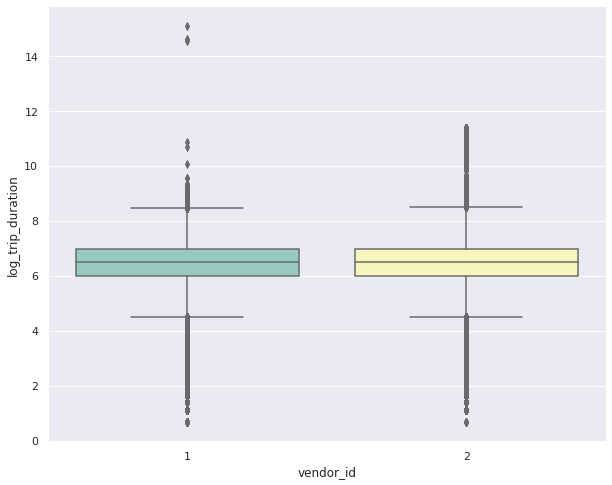

In [70]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
sns.boxplot(y = train['log_trip_duration'], palette="Set3", data = train, x = train['vendor_id'])

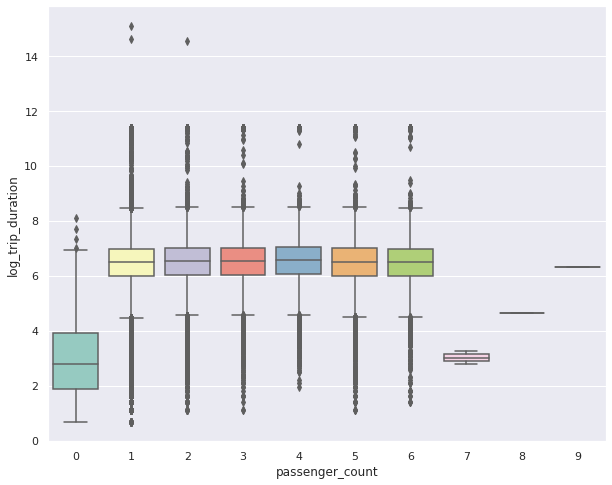

In [71]:
sns.boxplot(y = train['log_trip_duration'], palette="Set3", data = train, x = train['passenger_count'])

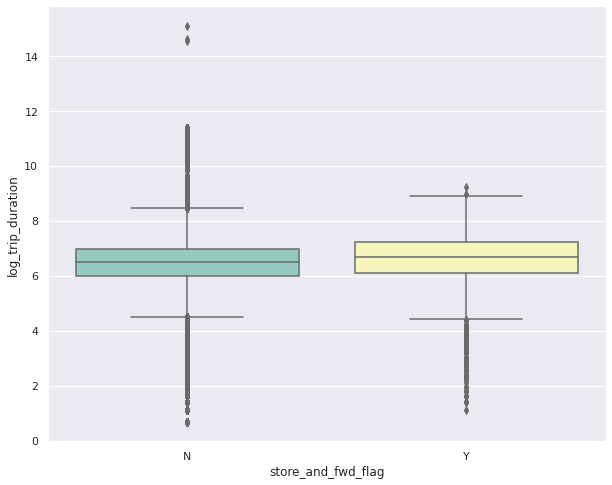

In [72]:
sns.boxplot(y = train['log_trip_duration'], palette="Set3", data = train, x = train['store_and_fwd_flag'])

Переведите признаки `vendor_id` и `store_and_fwd_flag` в значения $\{0;1\}$

In [73]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
train['vendor_id'] = train['vendor_id'].replace({1 : 0, 2 : 1})
train['store_and_fwd_flag'] = train['store_and_fwd_flag'].replace({'N' : 0, 'Y' : 1})

test['vendor_id'] = test['vendor_id'].replace({1 : 0, 2 : 1})
test['store_and_fwd_flag'] = test['store_and_fwd_flag'].replace({'N' : 0, 'Y' : 1})

**Вопрос**: Основываясь на графиках выше, как вы думаете, будут ли эти признаки сильными?

**Ответ:** Кажется, что эти признаки нам не помогут, потому что для разных значений признака мы получаем практически одинаковые значения целевой переменной. Только если passenger_count: когда этот признак равен 0, то продолжительность меньше, так как это скорее всего те случаи, когда такси едет к заказчику, а в данном случае обычно выбирается одна из ближайших машин => продолжительность меньше; когда != 0, то продолжительность больше. Также при store_and_fwd_flag == 'Y' продолжительность немного больше, но это не значительно. Попробуем дальше предположить, что эти признаки как-то влияют, и посмотрим, как будет работать модель. Но такие признаки мне кажутся немного бесполезными. 

**Задание 12 (0.25 баллов)**. Проверьте свои предположения, обучив модель в том числе и на этих трех признаках. Обучайте `Ridge`-регрессию со стандартными параметрами. Категориальные признаки закодируйте one-hot-кодированием, а численные отмасштабируйте.

In [74]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
X_train = train.drop(['log_trip_duration'], axis=1)[['hour', 'day_of_year', 'day_of_week', 'month', 'is_bad', 'log_haversine', 'airport_start', 'airport_finish', 'is_slow', 'grid_first', 'grid_second', 'vendor_id', 'store_and_fwd_flag', 'passenger_count']]
X_test = test.drop(['log_trip_duration'], axis=1)[['hour', 'day_of_year', 'day_of_week', 'month', 'is_bad', 'log_haversine', 'airport_start', 'airport_finish', 'is_slow', 'grid_first', 'grid_second', 'vendor_id', 'store_and_fwd_flag', 'passenger_count']]
y_train = train['log_trip_duration']
y_test = test['log_trip_duration']

In [75]:
notnum_feats = ['hour', 'day_of_week', 'month', 'airport_start', 'airport_finish', 'grid_first', 'vendor_id', 'grid_second', 'store_and_fwd_flag']
num_feats = ['day_of_year', 'passenger_count', 'is_bad', 'is_slow', 'log_haversine']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), notnum_feats),
    ('scaling', StandardScaler(), num_feats)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))
print("Test MSE = %.4f" % mean_squared_error(y_test, y_pred))

y_train_pred = model.predict(X_train)
print("Train RMSE = %.4f" % mean_squared_error(y_train, y_train_pred, squared=False))
print("Train MSE = %.4f" % mean_squared_error(y_train, y_train_pred))

Test RMSE = 0.5495
Test MSE = 0.3019
Train RMSE = 0.5479
Train MSE = 0.3002


**Ответ:** Особого улучшения модели нет, поэтому не стоит учитывать эти признаки.

Если признаки не дали какого-то ощутимого улучшения метрики, их можно выбросить из данных.

## Часть 4. Улучшаем модель (3 балла)

**Задание 13 (1 балл)**. В наших данных есть нетипичные объекты: с аномально маленьким времени поездки, с очень большим пройденным расстоянием или очень большими остатками регрессии. В этом задании предлагается исключить такие объекты из обучающей выборки. Для этого нарисуйте гистограммы распределения упомянутых выше величин, выберите объекты, которые можно назвать выбросами, и очистите обучающую выборку от них.

Отметим, что хотя эти объекты и выглядят как выбросы, в тестовой выборке тоже скорее всего будут объекты с такими же странными значениями целевой переменной и/или признаков. Поэтому, возможно, чистка обучающей выборки приведёт к ухудшению качества на тесте. Тем не менее, всё равно лучше удалять выбросы из обучения, чтобы модель получалась более разумной и интерпретируемой.

In [76]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
X_train = train.drop(['log_trip_duration'], axis=1)[['hour', 'day_of_year', 'day_of_week','month', 'is_bad', 'log_haversine', 'airport_start', 'airport_finish', 'is_slow', 'grid_first', 'grid_second']]
X_test = test.drop(['log_trip_duration'], axis=1)[['hour', 'day_of_year', 'day_of_week','month', 'is_bad', 'log_haversine', 'airport_start', 'airport_finish', 'is_slow', 'grid_first', 'grid_second']]
y_train = train['log_trip_duration']
y_test = test['log_trip_duration']

In [77]:
notnum_feats = ['hour', 'day_of_week', 'month', 'airport_start', 'airport_finish', 'grid_first', 'grid_second']
num_feats = ['day_of_year', 'log_haversine', 'is_slow', 'is_bad']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), notnum_feats),
    ('scaling', StandardScaler(), num_feats)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))
print("Test MSE = %.4f" % mean_squared_error(y_test, y_pred))

y_train_pred = model.predict(X_train)
print("Train RMSE = %.4f" % mean_squared_error(y_train, y_train_pred, squared=False))
print("Train MSE = %.4f" % mean_squared_error(y_train, y_train_pred))

Test RMSE = 0.5497
Test MSE = 0.3022
Train RMSE = 0.5481
Train MSE = 0.3005


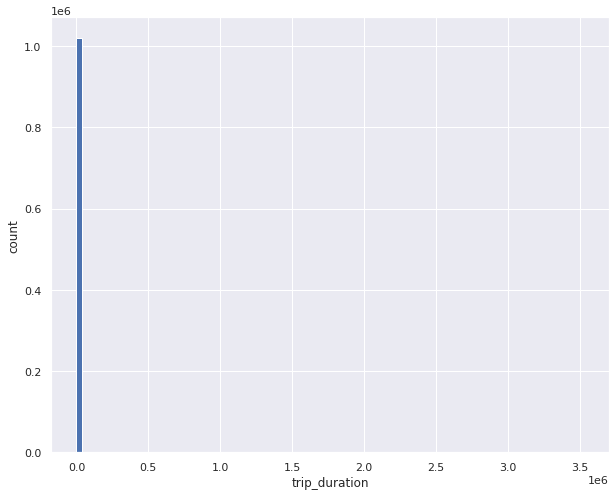

In [78]:
plt.hist(train['trip_duration'], bins=100)
plt.xlabel('trip_duration')
plt.ylabel('count')
plt.show()

In [79]:
train = train[(train['trip_duration'] < train['trip_duration'].quantile(0.90))]

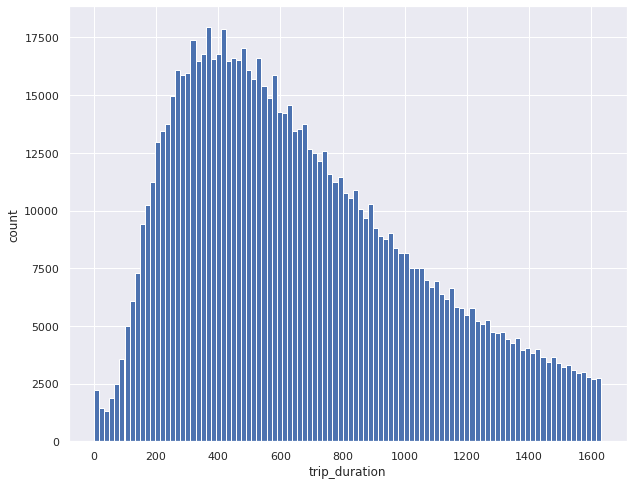

In [80]:
plt.hist(train['trip_duration'], bins=100)
plt.xlabel('trip_duration')
plt.ylabel('count')
plt.show()

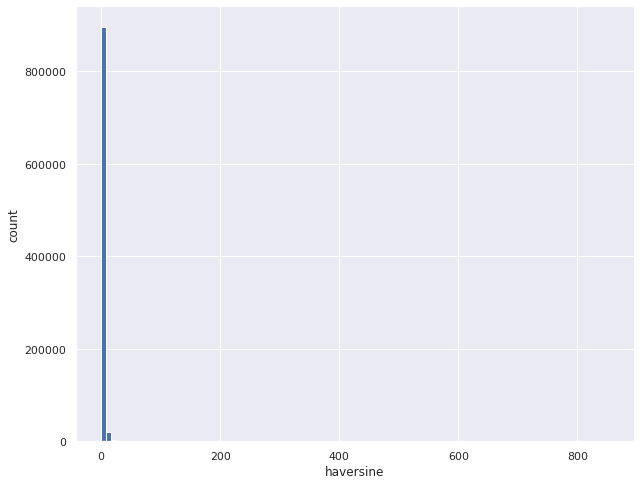

In [81]:
plt.hist(train['haversine'], bins=100)
plt.xlabel('haversine')
plt.ylabel('count')
plt.show()

In [82]:
train = train[(train['haversine'] < train['haversine'].quantile(0.90))]

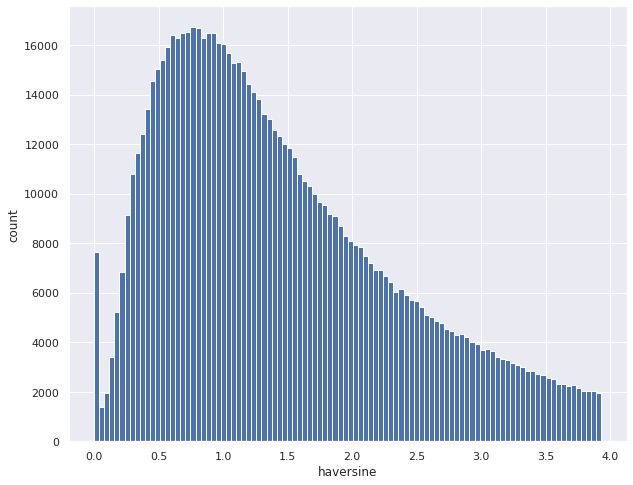

In [83]:
plt.hist(train['haversine'], bins=100)
plt.xlabel('haversine')
plt.ylabel('count')
plt.show()

In [84]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
X_train = train.drop(['log_trip_duration'], axis=1)[['hour', 'day_of_year', 'day_of_week','month', 'is_bad', 'log_haversine', 'airport_start', 'airport_finish', 'is_slow', 'grid_first', 'grid_second']]
X_test = test.drop(['log_trip_duration'], axis=1)[['hour', 'day_of_year', 'day_of_week','month', 'is_bad', 'log_haversine', 'airport_start', 'airport_finish', 'is_slow', 'grid_first', 'grid_second']]
y_train = train['log_trip_duration']
y_test = test['log_trip_duration']

In [85]:
notnum_feats = ['hour', 'day_of_week', 'month', 'airport_start', 'airport_finish', 'grid_first', 'grid_second']
num_feats = ['day_of_year', 'log_haversine', 'is_slow', 'is_bad']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), notnum_feats),
    ('scaling', StandardScaler(), num_feats)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))
print("Test MSE = %.4f" % mean_squared_error(y_test, y_pred))

y_train_pred = model.predict(X_train)
print("Train RMSE = %.4f" % mean_squared_error(y_train, y_train_pred, squared=False))
print("Train MSE = %.4f" % mean_squared_error(y_train, y_train_pred))

Test RMSE = 0.5753
Test MSE = 0.3310
Train RMSE = 0.5136
Train MSE = 0.2637


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


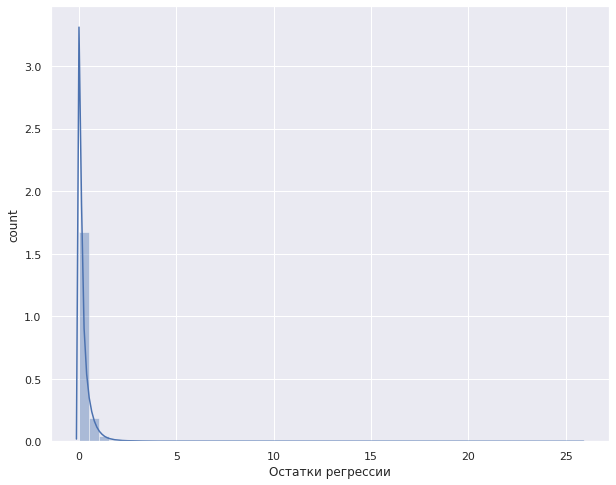

In [86]:
error = (y_train - model.predict(X_train)) ** 2
sns.distplot(error)
plt.xlabel('Остатки регрессии')
plt.ylabel('count')
plt.show()

In [87]:
mask = ((error < np.quantile(error, 0.90)))

In [88]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), notnum_feats),
    ('scaling', StandardScaler(), num_feats)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train[mask], y_train[mask])
y_pred = model.predict(X_test)
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))
print("Test MSE = %.4f" % mean_squared_error(y_test, y_pred))

y_train_pred = model.predict(X_train)
print("Train RMSE = %.4f" % mean_squared_error(y_train, y_train_pred, squared=False))
print("Train MSE = %.4f" % mean_squared_error(y_train, y_train_pred))

Test RMSE = 0.5719
Test MSE = 0.3271
Train RMSE = 0.5146
Train MSE = 0.2649


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


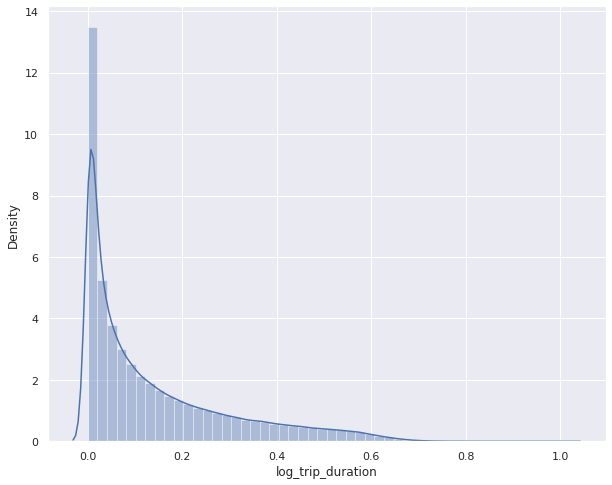

In [89]:
error = (y_train[mask] - model.predict(X_train[mask])) ** 2
sns.distplot(error)

Судя по графикам, выбросов стало значительно меньше.

*Замечание:* У меня получилось, что качество ухудшилось на тестовой выборке, когда мы убрали выбросы. Это может происходить, так как в тестовой выборке также большое количество выбросов.

Сейчас у нас очень много категориальных признаков. В категориальных признаках могут содержаться редкие категории, обычно это плохо: модель сильно переобучается на таких примерах. Попробуйте объединить редкие категории в одну. Естественно, делать это нужно только для действительно редких категорий.

Обучите модель на очищенных данных и посчитайте качество на тестовой выборке.

In [90]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
# напечатаем наши категориальные признаки
notnum_feats

['hour',
 'day_of_week',
 'month',
 'airport_start',
 'airport_finish',
 'grid_first',
 'grid_second']

Из всех этих признаков редкими можно считать 'airport_start' и 'airport_finish'. Попробуем их объединить так: не будем учитывать, что это два разных аэропорта.

In [91]:
train.loc[train['airport_start'] == 2, 'airport_start'] = 1

test.loc[test['airport_start'] == 2, 'airport_start'] = 1

train.loc[train['airport_finish'] == 2, 'airport_finish'] = 1

test.loc[test['airport_finish'] == 2, 'airport_finish'] = 1

In [92]:
X_train = train.drop(['log_trip_duration'], axis=1)[['hour', 'day_of_year', 'day_of_week','month', 'is_bad', 'log_haversine', 'airport_start', 'airport_finish', 'is_slow', 'grid_first', 'grid_second']]
X_test = test.drop(['log_trip_duration'], axis=1)[['hour', 'day_of_year', 'day_of_week','month', 'is_bad', 'log_haversine', 'airport_start', 'airport_finish', 'is_slow', 'grid_first', 'grid_second']]
y_train = train['log_trip_duration']
y_test = test['log_trip_duration']

In [93]:
notnum_feats = ['hour', 'day_of_week', 'month', 'grid_first', 'grid_second']
num_feats = ['day_of_year', 'log_haversine', 'is_slow', 'is_bad', 'airport_start', 'airport_finish']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), notnum_feats),
    ('scaling', StandardScaler(), num_feats)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))
print("Test MSE = %.4f" % mean_squared_error(y_test, y_pred))

y_train_pred = model.predict(X_train)
print("Train RMSE = %.4f" % mean_squared_error(y_train, y_train_pred, squared=False))
print("Train MSE = %.4f" % mean_squared_error(y_train, y_train_pred))

Test RMSE = 0.5705
Test MSE = 0.3255
Train RMSE = 0.5143
Train MSE = 0.2645


In [94]:
error = (y_train - model.predict(X_train)) ** 2
mask = (error < np.quantile(error, 0.90))

In [95]:
notnum_feats = ['hour', 'day_of_week', 'month', 'airport_start', 'airport_finish', 'grid_first', 'grid_second']
num_feats = ['day_of_year', 'log_haversine', 'is_slow', 'is_bad']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), notnum_feats),
    ('scaling', StandardScaler(), num_feats)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train[mask], y_train[mask])
y_pred = model.predict(X_test)
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))
print("Test MSE = %.4f" % mean_squared_error(y_test, y_pred))
X_train = X_train[mask]
y_train = y_train[mask]

y_train_pred = model.predict(X_train)
print("Train RMSE = %.4f" % mean_squared_error(y_train, y_train_pred, squared=False))
print("Train MSE = %.4f" % mean_squared_error(y_train, y_train_pred))

Test RMSE = 0.5665
Test MSE = 0.3209
Train RMSE = 0.3717
Train MSE = 0.1381


Попробуем объединить признаки с аэропортами следующим образом: если в маршруте одно из направлений аэропорт, то 1, иначе 0. И мы можем уже учитывать этот признак как численный.

In [96]:
train['airport'] = train['airport_start'] | train['airport_finish']

test['airport'] = test['airport_start'] | test['airport_finish']

In [97]:
X_train = train.drop(['log_trip_duration'], axis=1)[['hour', 'day_of_year', 'day_of_week','month', 'is_bad', 'log_haversine', 'airport', 'is_slow', 'grid_first', 'grid_second']]
X_test = test.drop(['log_trip_duration'], axis=1)[['hour', 'day_of_year', 'day_of_week','month', 'is_bad', 'log_haversine', 'airport', 'is_slow', 'grid_first', 'grid_second']]
y_train = train['log_trip_duration']
y_test = test['log_trip_duration']

In [98]:
notnum_feats = ['hour', 'day_of_week', 'month', 'grid_first', 'grid_second']
num_feats = ['day_of_year', 'log_haversine', 'is_slow', 'is_bad', 'airport']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), notnum_feats),
    ('scaling', StandardScaler(), num_feats)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))
print("Test MSE = %.4f" % mean_squared_error(y_test, y_pred))

y_train_pred = model.predict(X_train)
print("Train RMSE = %.4f" % mean_squared_error(y_train, y_train_pred, squared=False))
print("Train MSE = %.4f" % mean_squared_error(y_train, y_train_pred))

Test RMSE = 0.5573
Test MSE = 0.3106
Train RMSE = 0.5160
Train MSE = 0.2662


In [99]:
error = (y_train - model.predict(X_train)) ** 2
mask = (error < np.quantile(error, 0.90))

In [100]:
notnum_feats = ['hour', 'day_of_week', 'month', 'grid_first', 'grid_second']
num_feats = ['day_of_year', 'log_haversine', 'is_slow', 'is_bad', 'airport']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), notnum_feats),
    ('scaling', StandardScaler(), num_feats)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train[mask], y_train[mask])
y_pred = model.predict(X_test)
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))
print("Test MSE = %.4f" % mean_squared_error(y_test, y_pred))

y_train_pred = model.predict(X_train)
print("Train RMSE = %.4f" % mean_squared_error(y_train, y_train_pred, squared=False))
print("Train MSE = %.4f" % mean_squared_error(y_train, y_train_pred))

X_train = X_train[mask]
y_train = y_train[mask]

Test RMSE = 0.5572
Test MSE = 0.3105
Train RMSE = 0.5174
Train MSE = 0.2677


*Замечание:* до объединения признаков с аэропортами после кодирования было 6 (два признака по три возможных варианта), а после объединения их стало 2.

**Задание 14 (1 балл)**. После OneHot-кодирования количество признаков в нашем датасете сильно возрастает. Посчитайте колиество признаков до и после кодирования категориальных признаков.

In [101]:
X_train = train.drop(['log_trip_duration'], axis=1)[['hour', 'day_of_year', 'day_of_week','month', 'is_bad', 'log_haversine', 'airport', 'is_slow', 'grid_first', 'grid_second']]
X_test = test.drop(['log_trip_duration'], axis=1)[['hour', 'day_of_year', 'day_of_week','month', 'is_bad', 'log_haversine', 'airport', 'is_slow', 'grid_first', 'grid_second']]
y_train = train['log_trip_duration']
y_test = test['log_trip_duration']
print("Size before OneHot:", X_train.shape)
print("Size after  OneHot:", column_transformer.transform(X_train).shape)

Size before OneHot: (826964, 10)
Size after  OneHot: (826964, 66)


Попробуйте обучить не `Ridge`-, а `Lasso`-регрессию. Какой метод лучше?

In [102]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.linear_model import Lasso

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), notnum_feats),
    ('scaling', StandardScaler(), num_feats)
])

lasso_pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Lasso())
])

model = lasso_pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))
print("Test MSE = %.4f" % mean_squared_error(y_test, y_pred))

y_train_pred = model.predict(X_train)
print("Train RMSE = %.4f" % mean_squared_error(y_train, y_train_pred, squared=False))
print("Train MSE = %.4f" % mean_squared_error(y_train, y_train_pred))

Test RMSE = 0.8282
Test MSE = 0.6859
Train RMSE = 0.6691
Train MSE = 0.4477


In [103]:
error = (y_train - model.predict(X_train)) ** 2
mask = (error < np.quantile(error, 0.90))

X_train = X_train[mask]
y_train = y_train[mask]

Разбейте обучающую выборку на обучающую и валидационную в отношении 8:2. По валидационной выборке подберите оптимальные значения параметра регуляризации (по логарифмической сетке) для `Ridge` и `Lasso`, на тестовой выборке измерьте качество лучшей полученной модели.

In [104]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
train, val = train_test_split(train, test_size=0.2)

In [105]:
X_train = train.drop(['log_trip_duration'], axis=1)[['hour', 'day_of_year', 'day_of_week','month', 'is_bad', 'log_haversine', 'airport', 'is_slow', 'grid_first', 'grid_second']]
X_val = test.drop(['log_trip_duration'], axis=1)[['hour', 'day_of_year', 'day_of_week','month', 'is_bad', 'log_haversine', 'airport', 'is_slow', 'grid_first', 'grid_second']]
y_train = train['log_trip_duration']
y_val = test['log_trip_duration']

In [106]:
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline(steps=[
     ('ohe_and_scaling', column_transformer),
     ('regression', Ridge())
 ])

alphas = np.logspace(-2, 3, 20)
searcher = GridSearchCV(pipeline, [{"regression__alpha": alphas}],
                        scoring="neg_root_mean_squared_error", n_jobs=-1)
searcher.fit(X_val, y_val)

best_alpha1 = searcher.best_params_["regression__alpha"]
print("Best alpha = %.4f" % best_alpha1)

Best alpha = 14.3845


In [107]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), notnum_feats),
    ('scaling', StandardScaler(), num_feats)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge(best_alpha1))
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))
print("Test MSE = %.4f" % mean_squared_error(y_test, y_pred))

y_train_pred = model.predict(X_train)
print("Train RMSE = %.4f" % mean_squared_error(y_train, y_train_pred, squared=False))
print("Train MSE = %.4f" % mean_squared_error(y_train, y_train_pred))

Test RMSE = 0.5579
Test MSE = 0.3113
Train RMSE = 0.5159
Train MSE = 0.2661


In [108]:
from sklearn.model_selection import GridSearchCV

lasso_pipeline = Pipeline(steps=[
      ('ohe_and_scaling', column_transformer),
      ('regression', Lasso())
  ])

alphas = np.logspace(-4, 3, 20)
searcher = GridSearchCV(lasso_pipeline, [{"regression__alpha": alphas}],
                        scoring="neg_root_mean_squared_error", n_jobs=-1)
searcher.fit(X_val, y_val)

best_alpha_lasso1 = searcher.best_params_["regression__alpha"]
print("Best alpha = %.4f" % best_alpha_lasso1)

Best alpha = 0.0001


In [109]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), notnum_feats),
    ('scaling', StandardScaler(), num_feats)
])

lasso_pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Lasso(best_alpha_lasso1))
])

model = lasso_pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))
print("Test MSE = %.4f" % mean_squared_error(y_test, y_pred))

y_train_pred = model.predict(X_train)
print("Train RMSE = %.4f" % mean_squared_error(y_train, y_train_pred, squared=False))
print("Train MSE = %.4f" % mean_squared_error(y_train, y_train_pred))

Test RMSE = 0.5580
Test MSE = 0.3114
Train RMSE = 0.5159
Train MSE = 0.2662


Lasso явно улучшилось, а Ridge почему-то совсем немного. Но в итоге метрики получились практически одинаковыми для Ridge и Lasso.

Для каждого перебранного `alpha` для Lasso посчитайте количество нулевых весов в модели и нарисуйте график зависимости его от `alpha`. Как сильно придётся потерять в качестве, если мы хотим с помощью Lasso избавиться хотя бы от половины признаков?

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
count_of_zs = pd.DataFrame()
count_of_zs['alpha'] = np.nan
count_of_zs['count'] = np.nan
for alpha in np.logspace(-4, 3, 20):
  column_transformer = ColumnTransformer([
      ('ohe', OneHotEncoder(handle_unknown="ignore"), notnum_feats),
      ('scaling', StandardScaler(), num_feats)
  ])

  lasso_pipeline = Pipeline(steps=[
      ('ohe_and_scaling', column_transformer),
      ('regression', Lasso(alpha))
  ])

  model = lasso_pipeline.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  to_add = {'alpha' : alpha, 'count' : sum(model.named_steps['regression'].coef_==0)}

  count_of_zs = count_of_zs.append(to_add, ignore_index=True)

Text(12.334999999999994, 0.5, 'count')

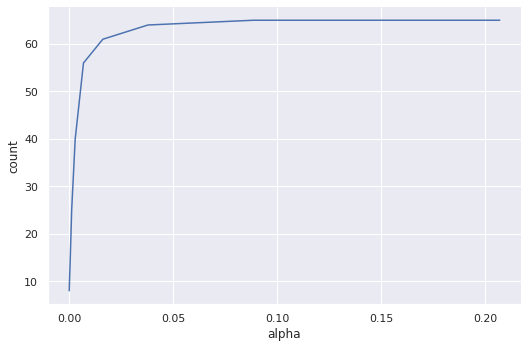

In [ ]:
x = count_of_zs['alpha'].head(10)
y = count_of_zs['count'].head(10)

sns.relplot(x = x, y = y, aspect=1.5, kind='line')

plt.xlabel('alpha')
plt.ylabel('count')

In [110]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), notnum_feats),
    ('scaling', StandardScaler(), num_feats)
])

lasso_pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Lasso(best_alpha_lasso1))
])

model = lasso_pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(np.square(mean_squared_error(y_test, y_pred)))

0.09694529103038908


<img src="https://www.dropbox.com/s/wp4jj0599np17lh/map_direction.png?raw=1" width="20%" align="right" style="margin-left: 20px">

**Задание 15 (1 балл)**. Часто бывает полезным использовать взаимодействия признаков (feature interactions), то есть строить новые признаки на основе уже существующих. Выше мы разбили карту Манхэттена на ячейки и придумали признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка".

Давайте попробуем сделать следующее: посчитаем, сколько раз встречается каждая возможная пара этих признаков в нашем датасете и выберем 100 самых частых пар. Закодируем поездки с этими частыми парами как категориальный признак, остальным объектам припишем -1. Получается, что мы закодировали, откуда и куда должно было ехать такси.

Также можете придумать ещё какой-нибудь способ сделать признаки про маршрут. Если эти признаки будут давать хороший прирост в качестве, то за это могут быть даны дополнительные бонусные баллы.

**Вопрос**: Почему такой признак потенциально полезный? Почему линейная модель не может самостоятельно "вытащить" эту информацию, ведь у нее в распоряжении есть признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка"?

**Ответ:** Признак полезный, так как если таких поездок много в обучающих данных, то скорее всего это распространенные поездки => их будет много и в тестовых данных. Линейная модель не может это вытащить, так как это нелинейная зависимость грубо говоря. Получается, что то, откуда началась поездка и где закончилась, - это отдельные признаки, и наша модель их не комбинирует между, а маршрут (т. е. комбинация этих двух признаков) - это уже новый целый признак.

In [111]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
train['top100'] = -1
train['route'] = train['grid_first'].astype(str) + ', ' + train['grid_second'].astype(str)

test['top100'] = -1
test['route'] = test['grid_first'].astype(str) + ', ' + test['grid_second'].astype(str)

In [112]:
# сто самых частых частых пар будут последними после сортировки
komb_grid = train[(train['route'] != 'nan, nan') & (train['route'] != '-1, -1')].groupby(['route']).count().sort_values('id').tail(100)

In [113]:
train.loc[train['route'].isin(komb_grid.index), 'top100'] = train['route']

test.loc[test['route'].isin(komb_grid.index), 'top100'] = test['route']

In [114]:
train['top100'] = train['top100'].astype(str)

test['top100'] = test['top100'].astype(str)

le = LabelEncoder()
train['top100'] = le.fit_transform(train['top100'])
test['top100'] = le.fit_transform(test['top100'])

Заново обучите модель (`Ridge`, если она дала более высокое качество в предыдущих экспериментах, и `Lasso` иначе) на новых даннных и посчитайте качество на тестовой выборке

In [115]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
X_train = train.drop(['log_trip_duration'], axis=1)[['hour', 'day_of_year', 'day_of_week','month', 'is_bad', 'log_haversine', 'airport', 'is_slow', 'grid_first', 'grid_second', 'top100']]
X_test = test.drop(['log_trip_duration'], axis=1)[['hour', 'day_of_year', 'day_of_week','month', 'is_bad', 'log_haversine', 'airport', 'is_slow', 'grid_first', 'grid_second', 'top100']]
y_train = train['log_trip_duration']
y_test = test['log_trip_duration']

In [116]:
notnum_feats = ['hour', 'day_of_week', 'month', 'grid_first', 'grid_second', 'top100']
num_feats = ['day_of_year', 'log_haversine', 'is_slow', 'is_bad', 'airport']

In [117]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), notnum_feats),
    ('scaling', StandardScaler(), num_feats)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))
print("Test MSE = %.4f" % mean_squared_error(y_test, y_pred))

y_train_pred = model.predict(X_train)
print("Train RMSE = %.4f" % mean_squared_error(y_train, y_train_pred, squared=False))
print("Train MSE = %.4f" % mean_squared_error(y_train, y_train_pred))

Test RMSE = 0.5352
Test MSE = 0.2865
Train RMSE = 0.4904
Train MSE = 0.2405


In [118]:
error = (y_train - model.predict(X_train)) ** 2
mask = (error < np.quantile(error, 0.90))

In [119]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), notnum_feats),
    ('scaling', StandardScaler(), num_feats)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train[mask], y_train[mask])
y_pred = model.predict(X_test)
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))
print("Test MSE = %.4f" % mean_squared_error(y_test, y_pred))

y_train_pred = model.predict(X_train)
print("Train RMSE = %.4f" % mean_squared_error(y_train, y_train_pred, squared=False))
print("Train MSE = %.4f" % mean_squared_error(y_train, y_train_pred))

Test RMSE = 0.5350
Test MSE = 0.2863
Train RMSE = 0.4919
Train MSE = 0.2419


In [120]:
train.drop('route', axis=1,inplace=True)

test.drop('route', axis=1,inplace=True)

**Задание 16 (бонус, 1 балл)**. Где, как не для нашей задачи, считать манхэттенское расстояние?

**Вопрос**: Найдите, что такое манхэттенское расстояние и почему оно так называется. Как оно нам может помочь?

Введите систему координат на нашей карте так, чтобы оси были параллельны улицам Манхэттена, и добавьте сначала в данные признак "манхэттенское расстояние между пунктом отправления и пунктом назначения", а затем и логарифм этого признака. Посчитайте корреляцию между вашим новыми признаком и таргетом; между `log_haversine` и таргетом. В каком случае корреляция больше?

Нарисуйте карту, где покажете выбранные оси. Чтобы мы могли проверить вашу работу, просьба сделать скрин этой карты и приложить картинку (если мы откроем ваш ноутбук, виджеты отображаться не будут). 

**Ответ:** Манхэттенское расстояние -  метрика, введённая Германом Минковским. Согласно этой метрике, расстояние между двумя точками равно сумме модулей разностей их координат.

Оно названо так потому, что это расстояние, которое автомобиль мог бы проехать в городе, состоящем из квадратных кварталов, таких как Манхэттен.

Посмторим, как оно будет приближать наш таргет, так как тут расстояние высчитывается по определенному правилу, и может что-то поменяться.

In [121]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from scipy.spatial import distance
from scipy. spatial.distance import cityblock

In [122]:
# show_circles_on_map(df_train.sample(1000), "pickup_latitude", "pickup_longitude", "blue")

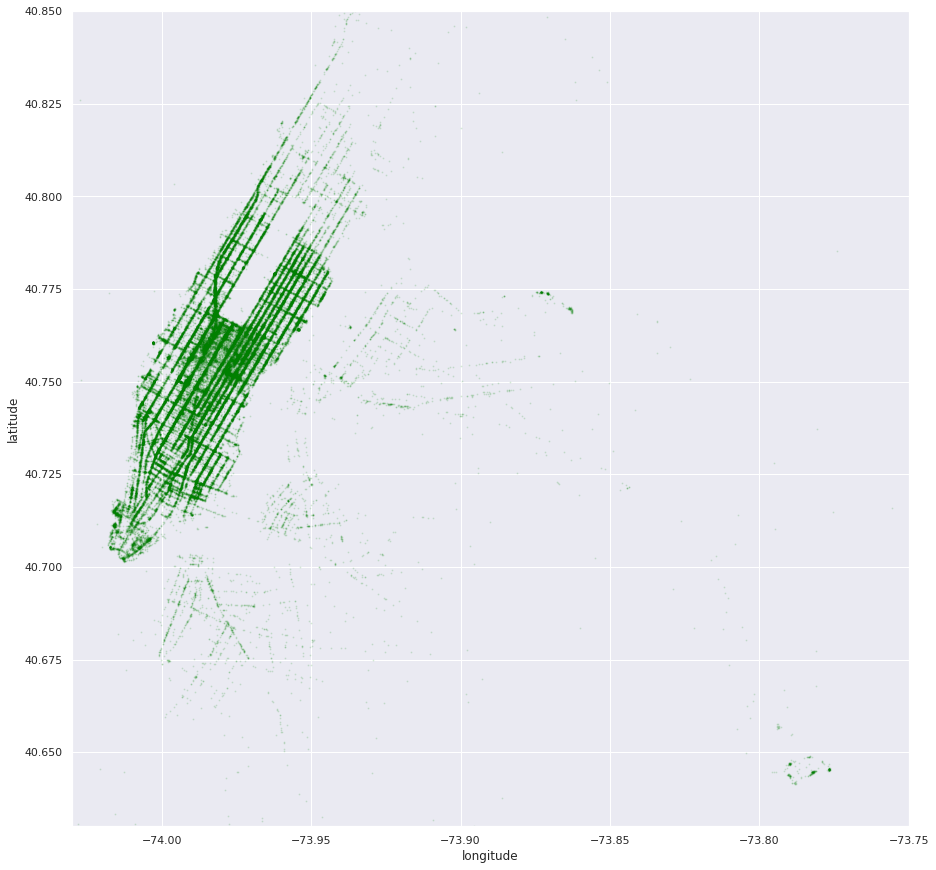

In [123]:
N = 100000
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)
plt.figure(figsize=(15,15))
plt.scatter(train['pickup_longitude'].values[:N], train['pickup_latitude'].values[:N],
              color='green', s=1, label='train', alpha=0.1)
plt.ylabel('latitude')
plt.xlabel('longitude')
plt.ylim(city_lat_border)
plt.xlim(city_long_border)
plt.show()

Выберем точки для построения осей:


In [124]:
start = tuple([40.7834, -73.9662])
X_ = tuple([40.778612, -73.954188])
Y_ = tuple([40.799285, -73.954644])

In [125]:
def manh_dist(lat1, lon1, lat2, lon2):
  l = np.array([
      abs(lat1 - lon1),
      abs(lat2 - lon2)
  ])
  return l[0] + l[1]

Посчитаем координаты в новой системе координат для всех точек. Тут я пользуюсь математикой: мы поворачиваем на 37 градусов (это я высчитала через направляющие векторы старой и новой системы координат). По этим формулам считаем новые координаты:

x = X cos α— Y sin α + a

y = X sin α + Y cos α + b

In [126]:
train['pickup_latitude_new'] = (train['pickup_longitude'] * (0.6084290565) + train['pickup_latitude'] * (0.7936082681) + start[1])
train['pickup_longitude_new'] = (train['pickup_longitude'] * (0.7936082681) - train['pickup_latitude'] * (0.6084290565) + start[0])
train['dropoff_latitude_new'] = (train['dropoff_longitude'] * (0.6084290565) + train['dropoff_latitude'] * (0.7936082681) + start[1])
train['dropoff_longitude_new'] = (train['dropoff_longitude'] * (0.7936082681) - train['dropoff_latitude'] * (0.6084290565) + start[0])

test['pickup_latitude_new'] = (test['pickup_longitude'] * (0.6084290565) + test['pickup_latitude'] * (0.7936082681) + start[1])
test['pickup_longitude_new'] = (test['pickup_longitude'] * (0.7936082681) - test['pickup_latitude'] * (0.6084290565) + start[0])
test['dropoff_latitude_new'] = (test['dropoff_longitude'] * (0.6084290565) + test['dropoff_latitude'] * (0.7936082681) + start[1])
test['dropoff_longitude_new'] = (test['dropoff_longitude'] * (0.7936082681) - test['dropoff_latitude'] * (0.6084290565) + start[0])
train['pickup_longitude_new'].max()

-32.37986276594535

In [127]:
train['manh_dist'] = manh_dist(train['pickup_latitude_new'], train['pickup_longitude_new'], train['dropoff_latitude_new'], train['dropoff_longitude_new'])
train['log_manh_dist'] = np.log1p(train['manh_dist'])

test['manh_dist'] = manh_dist(test['pickup_latitude_new'], test['pickup_longitude_new'], test['dropoff_latitude_new'], test['dropoff_longitude_new'])
test['log_manh_dist'] = np.log1p(test['manh_dist'])

train

id  vendor_id     pickup_datetime  passenger_count  \
779577   id1223588          0 2016-03-12 13:40:30                1   
64911    id0530653          1 2016-05-22 01:50:28                1   
378178   id1770084          1 2016-04-26 21:14:09                1   
40757    id2422989          1 2016-04-07 16:38:38                1   
590022   id2878366          0 2016-03-23 13:50:20                1   
...            ...        ...                 ...              ...   
214194   id1823998          1 2016-03-22 17:26:16                1   
428132   id1854785          1 2016-02-29 11:16:11                1   
1170324  id2994702          1 2016-04-01 15:16:31                1   
717203   id1470710          1 2016-05-17 13:30:38                1   
1439786  id1426970          0 2016-05-23 19:44:30                1   

         pickup_longitude  pickup_latitude  dropoff_longitude  \
779577         -73.981285        40.764744         -73.998917   
64911          -73.987946        40.723770         -73.987350   
378178         -73.973572        40.757393         -73.978119   
40757          -73.992798        40.742912         -73.975067   
590022         -73.951164        40.673641         -73.950745   
...                   ...              ...                ...   
214194         -73.975273        40.754021         -73.977585   
428132         -73.983604        40.761055         -73.978119   
1170324        -73.997108        40.722260         -73.989929   
717203         -74.007248        40.703533         -74.014084   
1439786        -73.981697        40.773693         -73.983215   

         dropoff_latitude  store_and_fwd_flag  trip_duration  ...  grid_first  \
779577          40.761101                   0            885  ...           5   
64911           40.729164                   0            141  ...          11   
378178          40.763405                   0            417  ...           8   
40757           40.749332                   0            615  ...           7   
590022          40.666523                   0            329  ...          -1   
...                   ...                 ...            ...  ...         ...   
214194          40.762001                   0            460  ...           8   
428132          40.752483                   0            739  ...           5   
1170324         40.753273                   0           1576  ...          -1   
717203          40.712742                   0            333  ...          -1   
1439786         40.750938                   0            654  ...           5   

         grid_second  airport top100  pickup_latitude_new  \
779577             4        0     64           -86.627326   
64911             11        0     21           -86.663895   
378178             5        0     97           -86.628467   
40757              8        0     89           -86.651656   
590022            -1        0      0           -86.681299   
...              ...      ...    ...                  ...   
214194             5        0     97           -86.632178   
428132             8        0     68           -86.631664   
1170324            8        0     10           -86.670669   
717203            -1        0      0           -86.691700   
1439786            8        0     68           -86.620474   

         pickup_longitude_new  dropoff_latitude_new  dropoff_longitude_new  \
779577             -42.731214            -86.640944             -42.742990   
64911              -42.711570            -86.659252             -42.714380   
378178             -42.720620            -86.626462             -42.727887   
40757              -42.727068            -86.635773             -42.716903   
590022             -42.651881            -86.686693             -42.647217   
...                       ...                   ...                    ...   
214194             -42.719919            -86.627251             -42.726609   
428132             -42.730810            -86.635129             

In [128]:
train.loc[:,['log_manh_dist','log_trip_duration','manh_dist']].corr().iloc[[0,2],[1]]

log_trip_duration
log_manh_dist           0.068754
manh_dist               0.068013

In [129]:
train.loc[:,['log_haversine','log_trip_duration','manh_dist']].corr().iloc[[0,2],[1]]

log_trip_duration
log_haversine           0.575998
manh_dist               0.068013

Карта в новой системе координат:

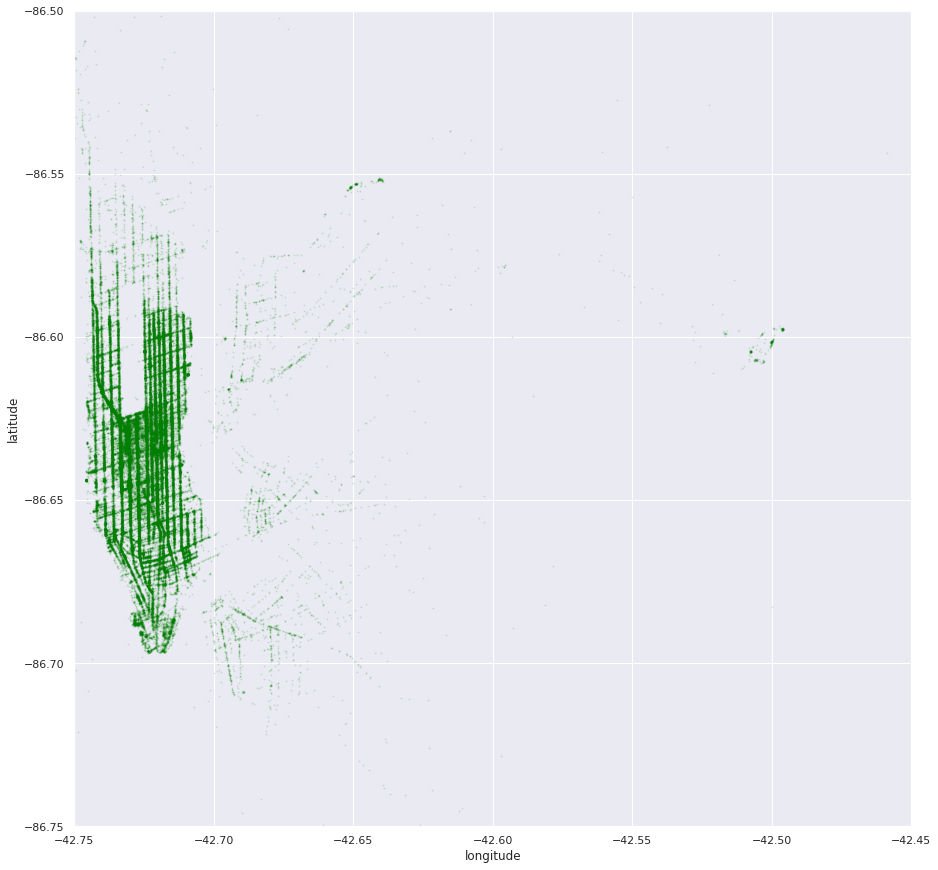

In [130]:
N = 100000
city_long_border = (-42.75, -42.45)
city_lat_border = (-86.75, -86.5)
plt.figure(figsize=(15,15))
plt.scatter(train['pickup_longitude_new'].values[:N], train['pickup_latitude_new'].values[:N],
              color='green', s=1, label='train', alpha=0.1)
plt.ylabel('latitude')
plt.xlabel('longitude')
plt.ylim(city_lat_border)
plt.xlim(city_long_border)
plt.show()

In [131]:
map = show_circles_on_map(train.sample(10), "pickup_latitude", "pickup_longitude", "blue")

line_y = list()
line_y.append(start)
line_y.append(Y_)
folium.PolyLine(line_y, color = 'red', weight=5).add_to(map)

folium.Marker(start).add_to(map)
line_x = list()
line_x.append(start)
line_x.append(X_)
folium.PolyLine(line_x, color = 'red', weight=5).add_to(map)

map

Заново обучите модель на новых даннных и посчитайте качество на тестовой выборке. Стало ли лучше? Объясните полученный результат.

Обучим с manh_dist.

In [132]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
X_train = train.drop(['log_trip_duration'], axis=1)[['hour', 'day_of_year', 'day_of_week','month', 'is_bad', 'log_haversine', 'airport', 'is_slow', 'grid_first', 'grid_second', 'top100', 'manh_dist']]
X_test = test.drop(['log_trip_duration'], axis=1)[['hour', 'day_of_year', 'day_of_week','month', 'is_bad', 'log_haversine', 'airport', 'is_slow', 'grid_first', 'grid_second', 'top100', 'manh_dist']]
y_train = train['log_trip_duration']
y_test = test['log_trip_duration']

In [133]:
notnum_feats = ['hour', 'day_of_week', 'month', 'grid_first', 'grid_second', 'top100']
num_feats = ['day_of_year', 'log_haversine', 'is_slow', 'is_bad', 'airport', 'manh_dist']

In [134]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), notnum_feats),
    ('scaling', StandardScaler(), num_feats)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))
print("Test MSE = %.4f" % mean_squared_error(y_test, y_pred))

y_train_pred = model.predict(X_train)
print("Train RMSE = %.4f" % mean_squared_error(y_train, y_train_pred, squared=False))
print("Train MSE = %.4f" % mean_squared_error(y_train, y_train_pred))

Test RMSE = 0.5351
Test MSE = 0.2863
Train RMSE = 0.4904
Train MSE = 0.2405


In [135]:
error = (y_train - model.predict(X_train)) ** 2
mask = (error < np.quantile(error, 0.90))

In [136]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), notnum_feats),
    ('scaling', StandardScaler(), num_feats)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train[mask], y_train[mask])
y_pred = model.predict(X_test)
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))
print("Test MSE = %.4f" % mean_squared_error(y_test, y_pred))

y_train_pred = model.predict(X_train)
print("Train RMSE = %.4f" % mean_squared_error(y_train, y_train_pred, squared=False))
print("Train MSE = %.4f" % mean_squared_error(y_train, y_train_pred))

Test RMSE = 0.5346
Test MSE = 0.2858
Train RMSE = 0.4919
Train MSE = 0.2420


Обучим с log_manh_dist.

In [137]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
X_train = train.drop(['log_trip_duration'], axis=1)[['hour', 'day_of_year', 'day_of_week','month', 'is_bad', 'log_haversine', 'airport', 'is_slow', 'grid_first', 'grid_second', 'top100', 'log_manh_dist']]
X_test = test.drop(['log_trip_duration'], axis=1)[['hour', 'day_of_year', 'day_of_week','month', 'is_bad', 'log_haversine', 'airport', 'is_slow', 'grid_first', 'grid_second', 'top100', 'log_manh_dist']]
y_train = train['log_trip_duration']
y_test = test['log_trip_duration']

In [138]:
notnum_feats = ['hour', 'day_of_week', 'month', 'grid_first', 'grid_second', 'top100']
num_feats = ['day_of_year', 'log_haversine', 'is_slow', 'is_bad', 'airport', 'log_manh_dist']

In [139]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), notnum_feats),
    ('scaling', StandardScaler(), num_feats)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))
print("Test MSE = %.4f" % mean_squared_error(y_test, y_pred))

y_train_pred = model.predict(X_train)
print("Train RMSE = %.4f" % mean_squared_error(y_train, y_train_pred, squared=False))
print("Train MSE = %.4f" % mean_squared_error(y_train, y_train_pred))

Test RMSE = 0.5350
Test MSE = 0.2862
Train RMSE = 0.4904
Train MSE = 0.2405


In [140]:
error = (y_train - model.predict(X_train)) ** 2
mask = (error < np.quantile(error, 0.90))

In [141]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), notnum_feats),
    ('scaling', StandardScaler(), num_feats)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train[mask], y_train[mask])
y_pred = model.predict(X_test)
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))
print("Test MSE = %.4f" % mean_squared_error(y_test, y_pred))

y_train_pred = model.predict(X_train)
print("Train RMSE = %.4f" % mean_squared_error(y_train, y_train_pred, squared=False))
print("Train MSE = %.4f" % mean_squared_error(y_train, y_train_pred))

Test RMSE = 0.5346
Test MSE = 0.2858
Train RMSE = 0.4919
Train MSE = 0.2420


Качество модели не стало лучше,так как эти признаки не особо хорошо коррелируют с таргетом. Но с логарифмом манхэттенского расстояния получилось чуть лучше, потому что он коррелирует лучше, чем просто манхэттенское расстояние. Очень грустно, потому что я намучалась с переводом координат..





**Задание 17 (бонус, 2 балла)**. Реализуйте трансформер, который строит разбиение карты по шестигранной решётке с помощью библиотеки [H3](https://github.com/uber/h3-py) и вычисляет признаки на основе такого разбиения.

Признаки могут быть самые разные: расстояние между точкой старта и финиша, посчитанное в количестве шестиугольников; статистика по числу поездок и по их продолжительности в соседних шестиугольниках.

Важно: производительность библиотеки существенно зависит от количества шестиугольников на карте (определяется параметром resolution). Подберите такое разрешение, при котором ваш код будет работать за приемлемое время.

При построении признаков старайтесь не допустить утечки целевой переменной (подробнее про это можно почитать в материалах 1-го семинара) — в противном случае хорошего качества на тестовой выборке достичь не получится.

Измерьте качество после добавления новых признаков. За улучшение функционала ошибки на каждые 0.005 на тестовой выборке будет даваться 0.5 бонусных балла. Можно получить до 2 бонусных баллов за это задание.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Вставьте картинку, описывающую ваш опыт выполнения этого ДЗ.